In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import os
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode']=True
# matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True
import matplotlib.pyplot as plt

In [2]:
global_palette = "tab10"#["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"][:5]
ROOTS = {
 "../build/work_sharing_async_outputs/": "async", "../build/work_sharing_sync_outputs/": "sync"   
}
# algorithm_names = {"prm_fixed_graph": "PRM Fixed Graph", "prm_common_seed": "PRM Common Seed"}
algorithm_names = {"prm_common_seed": "PRM Common Seed"}
# algorithm_names = {"prm_fixed_graph": "PRM Fixed Graph"}
scenario = "fetch1"

### Lambda Start/ End time 

In [3]:
plot_lambdas = sorted([32, ])
plot_lambdas_id = "-".join(str(first) for first in plot_lambdas)
df = None
SAVE_ROOT = "../build/aggregate_figures/{}".format(plot_lambdas_id)
if not os.path.exists(SAVE_ROOT): os.makedirs(SAVE_ROOT)

for root, root_name in ROOTS.items():
    curr_df = pd.read_csv("{}/lambda_start_end_times.csv".format(root))
    curr_df = curr_df[curr_df["num_lambdas"].isin(plot_lambdas)]
    curr_df = curr_df[curr_df["scenario"] == scenario]
    curr_df["root_name"] = root_name
    if df is None:
        df = curr_df
    else:
        df = pd.concat([df, curr_df])
df["identifier"] = list(zip(df.root_name, df.num_lambdas, df.num_samples, ))
df

,Unnamed: 0,algorithm,graph_size,lambda_duration,lambda_end_time,lambda_start_time,num_lambdas,num_samples,scenario,trial_num,root_name,identifier
23,23,prm_common_seed,3000,2650,2650,0,32,20,fetch1,trial=2,async,"(async, 32, 20)"
24,24,prm_common_seed,3000,2694,2694,0,32,20,fetch1,trial=2,async,"(async, 32, 20)"
25,25,prm_common_seed,3000,2149,2149,0,32,20,fetch1,trial=2,async,"(async, 32, 20)"
26,26,prm_common_seed,3000,2800,2800,0,32,20,fetch1,trial=2,async,"(async, 32, 20)"
27,27,prm_common_seed,3000,1987,1987,0,32,20,fetch1,trial=2,async,"(async, 32, 20)"
...,...,...,...,...,...,...,...,...,...,...,...,...
676,676,prm_common_seed,3000,2925,2926,1,32,1,fetch1,trial=1,sync,"(sync, 32, 1)"
677,677,prm_common_seed,3000,2919,2920,1,32,1,fetch1,trial=1,sync,"(sync, 32, 1)"
678,678,prm_common_seed,3000,2922,2942,20,32,1,fetch1,trial=1,sync,"(sync, 32, 1)"
679,679,prm_common_seed,3000,2917,2948,31,32,1,fetch1,trial=1,sync,"(sync, 32, 1)"


In [4]:
plot_order = sorted(df.identifier.unique())

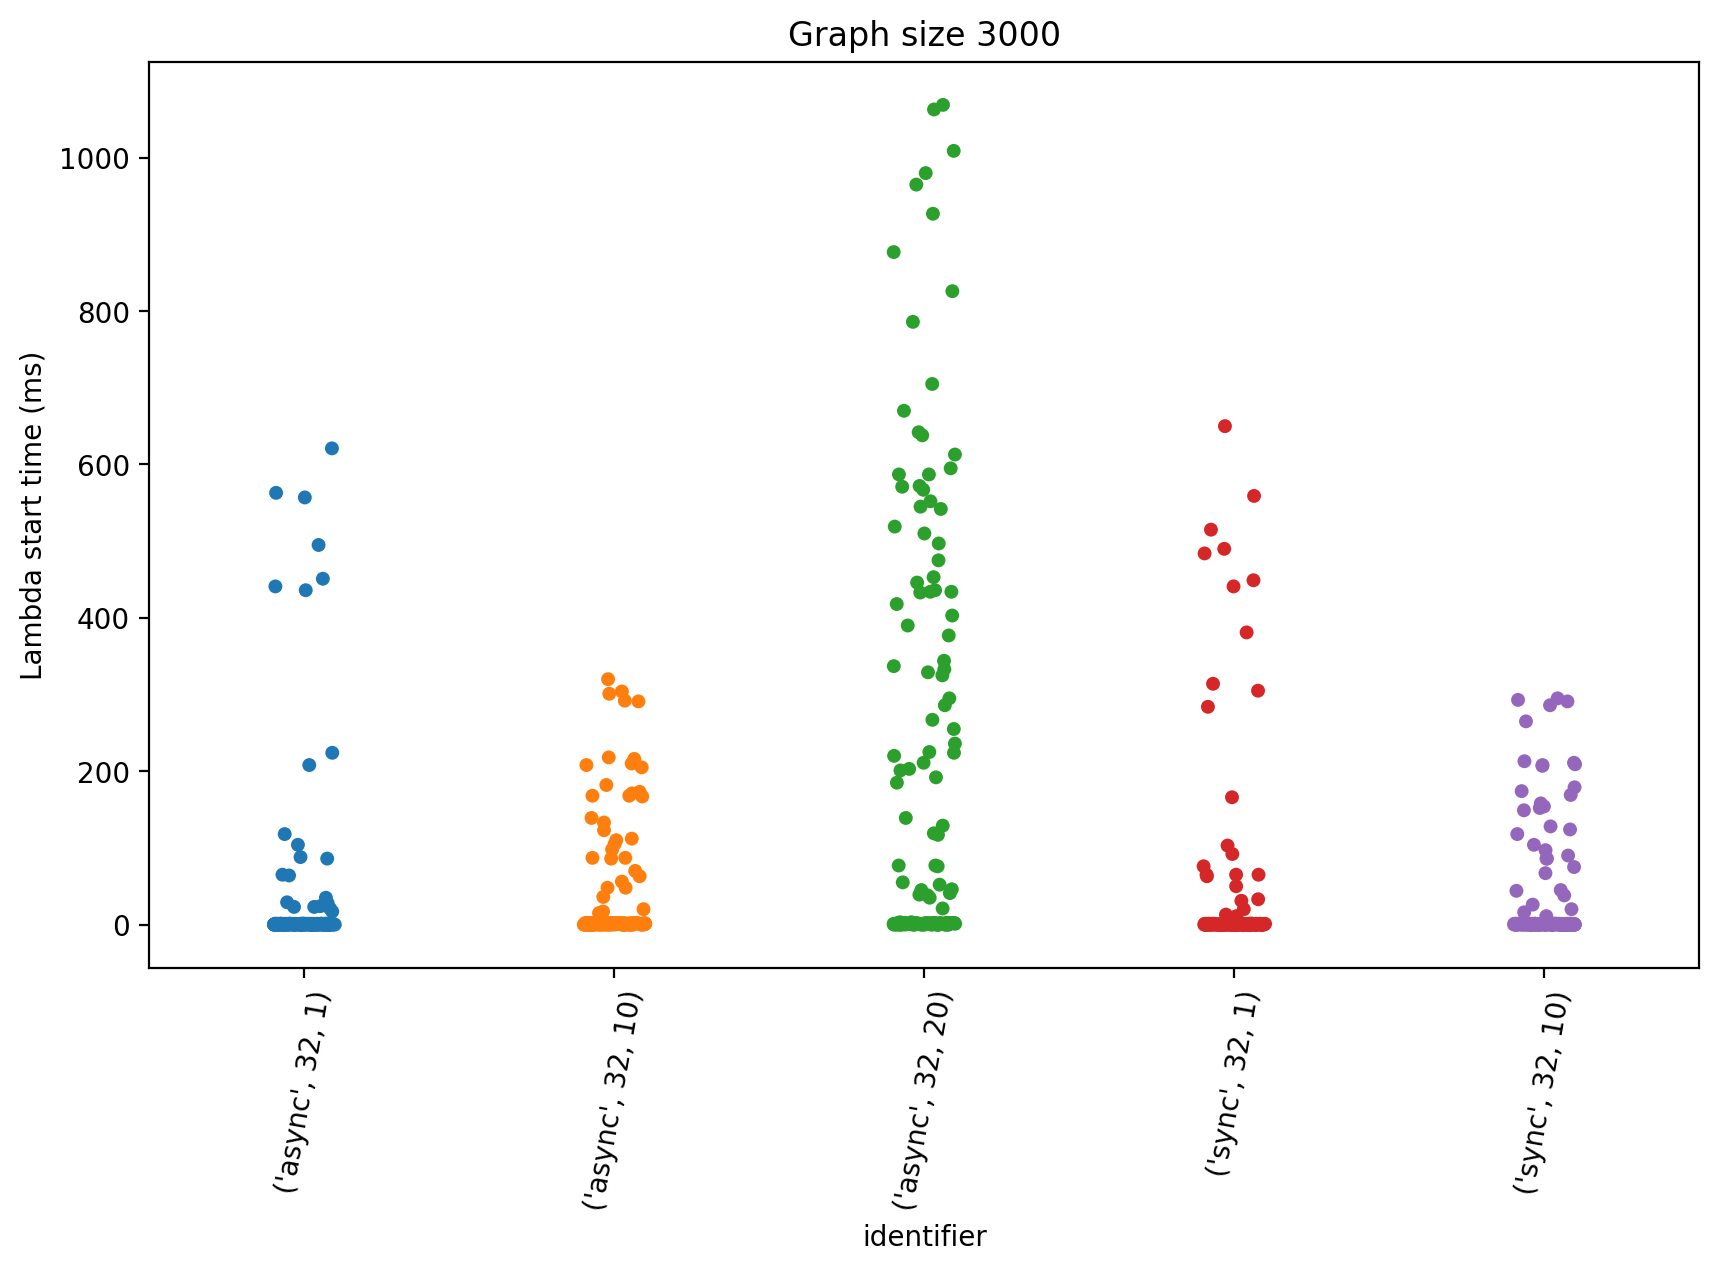

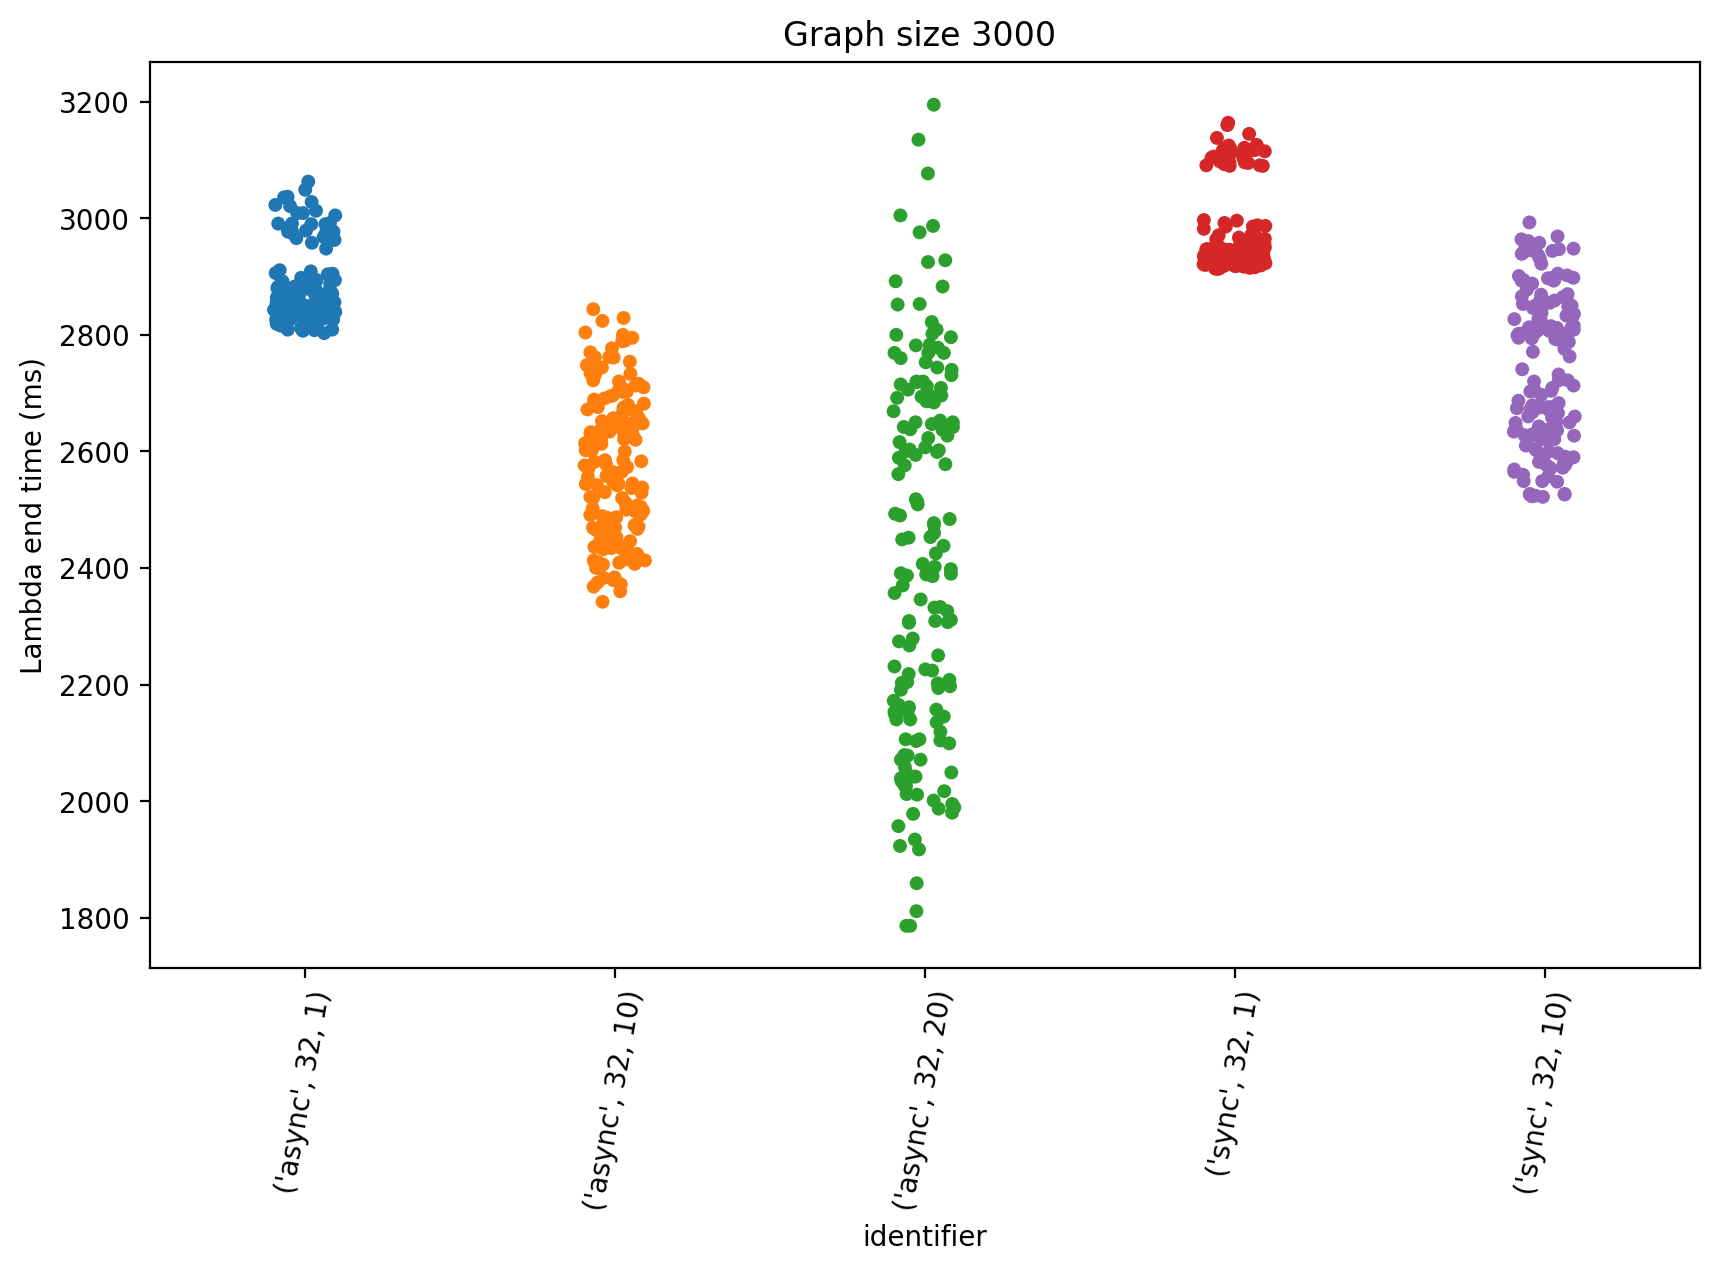

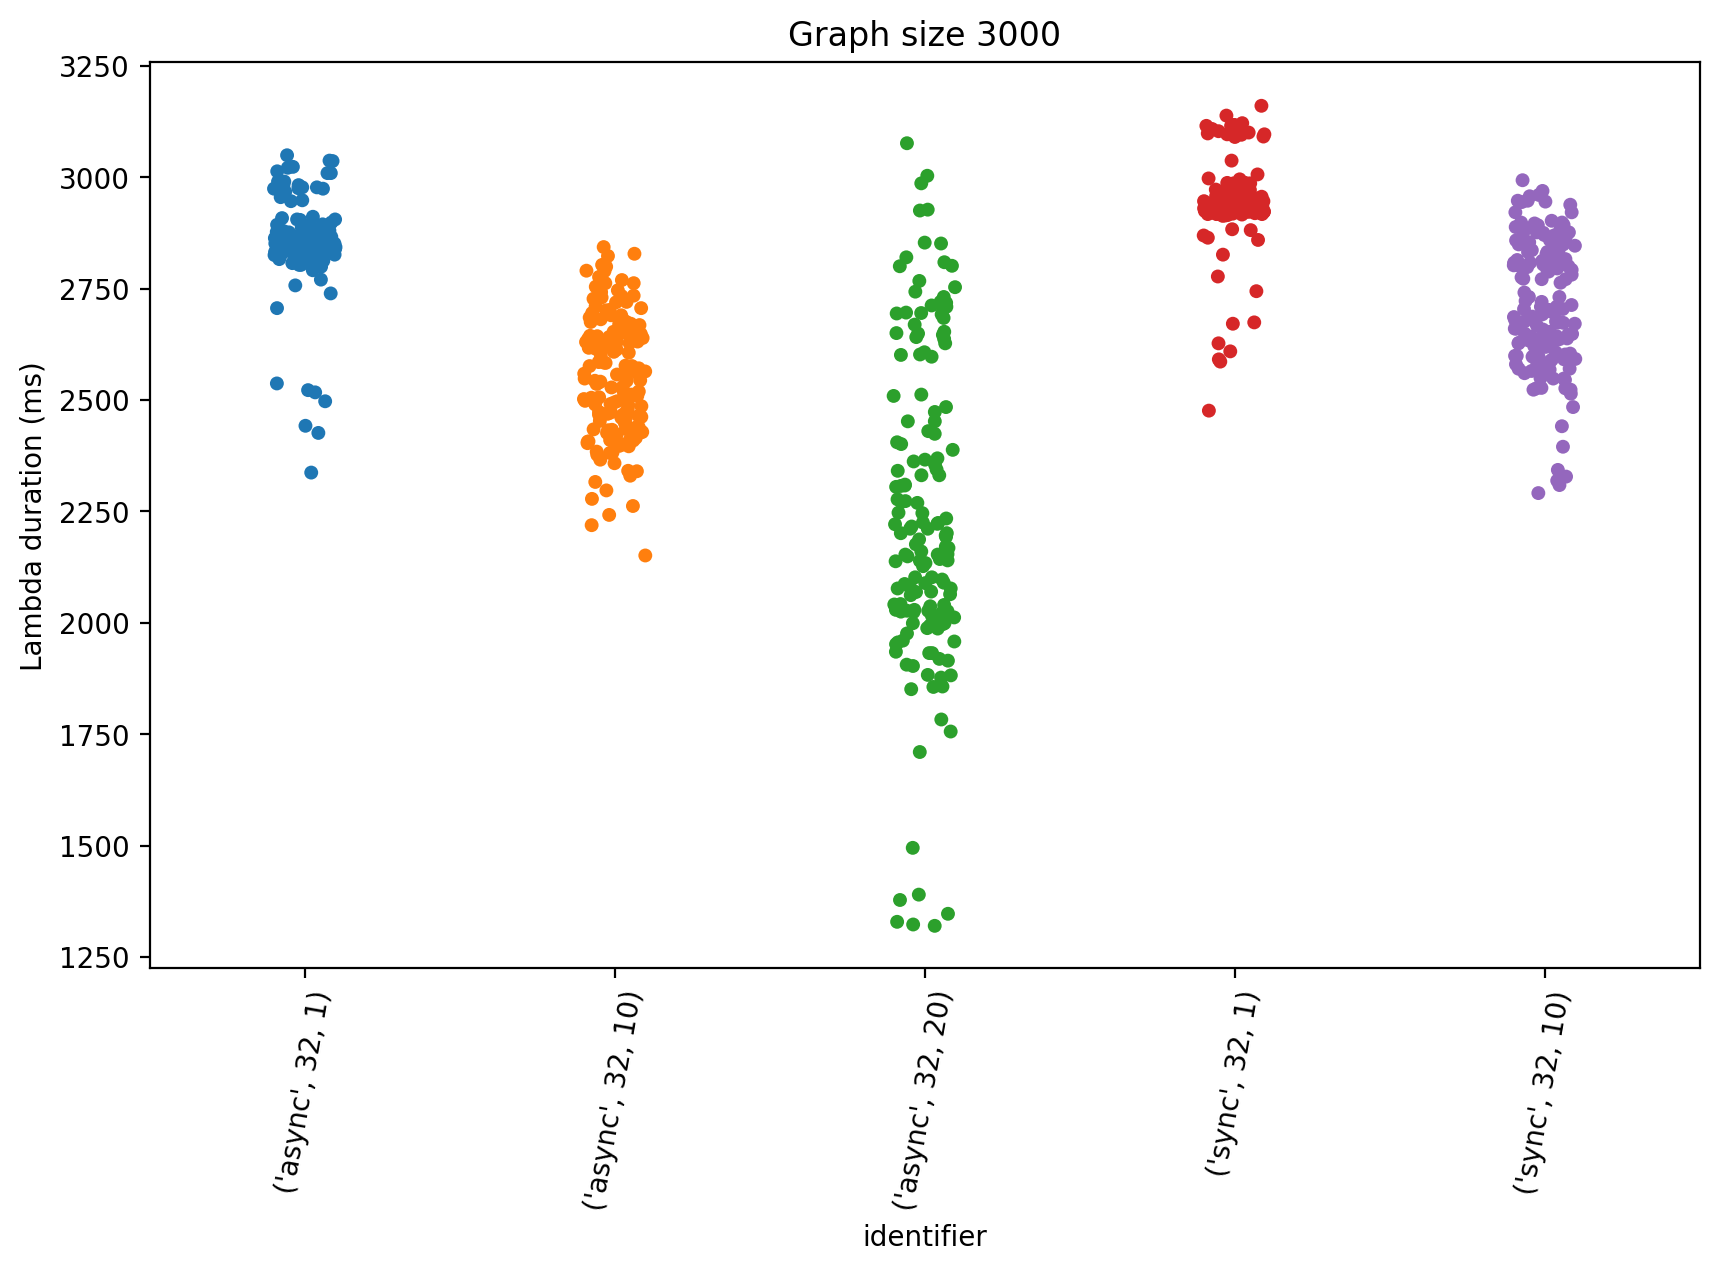

In [5]:
for (graph_size), group in df.groupby(["graph_size"]):
    group = group.reset_index()
    plt.figure(figsize=(10, 6), dpi=200)
    sns.stripplot(y="lambda_start_time", x="identifier", data=group, order=plot_order)
    plt.ylabel("Lambda start time (ms)")
    plt.title("Graph size {}".format(graph_size))
    plt.xticks(rotation=80)
    plt.savefig("{}/lambda_start_times_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,))
    plt.show()

    plt.figure(figsize=(10, 6), dpi=200)
    sns.stripplot(y="lambda_end_time", x="identifier", data=group, order=plot_order)
    plt.ylabel("Lambda end time (ms)")
    plt.title("Graph size {} ".format(graph_size, ))
    plt.savefig("{}/lambda_end_times_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,))
    plt.xticks(rotation=80)
    plt.show()


    plt.figure(figsize=(10, 6), dpi=200)
    sns.stripplot(y="lambda_duration", x="identifier", data=group, order=plot_order)
    plt.ylabel("Lambda duration (ms)")
    plt.title("Graph size {}".format(graph_size,))
    plt.savefig("{}/lambda_duration_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,))
    plt.xticks(rotation=80)
    plt.show()



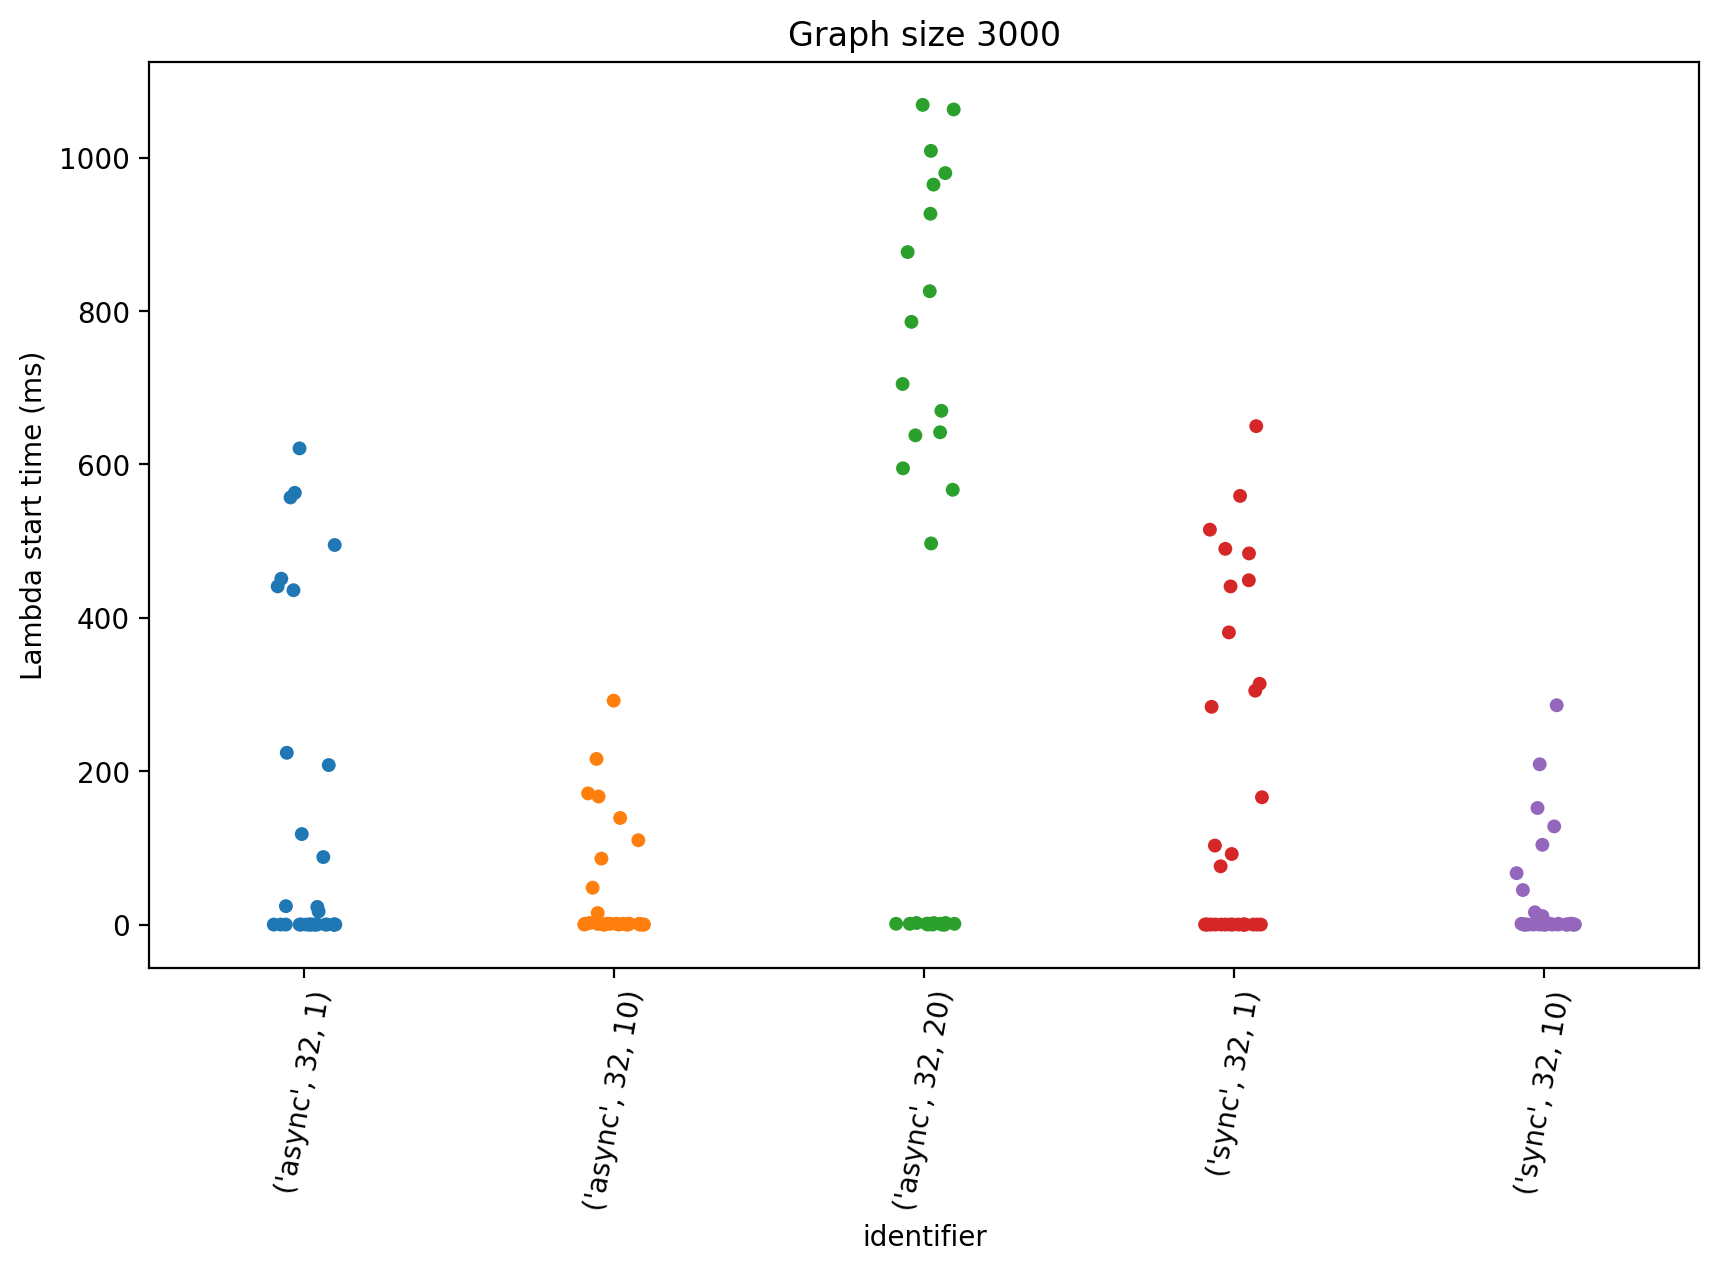

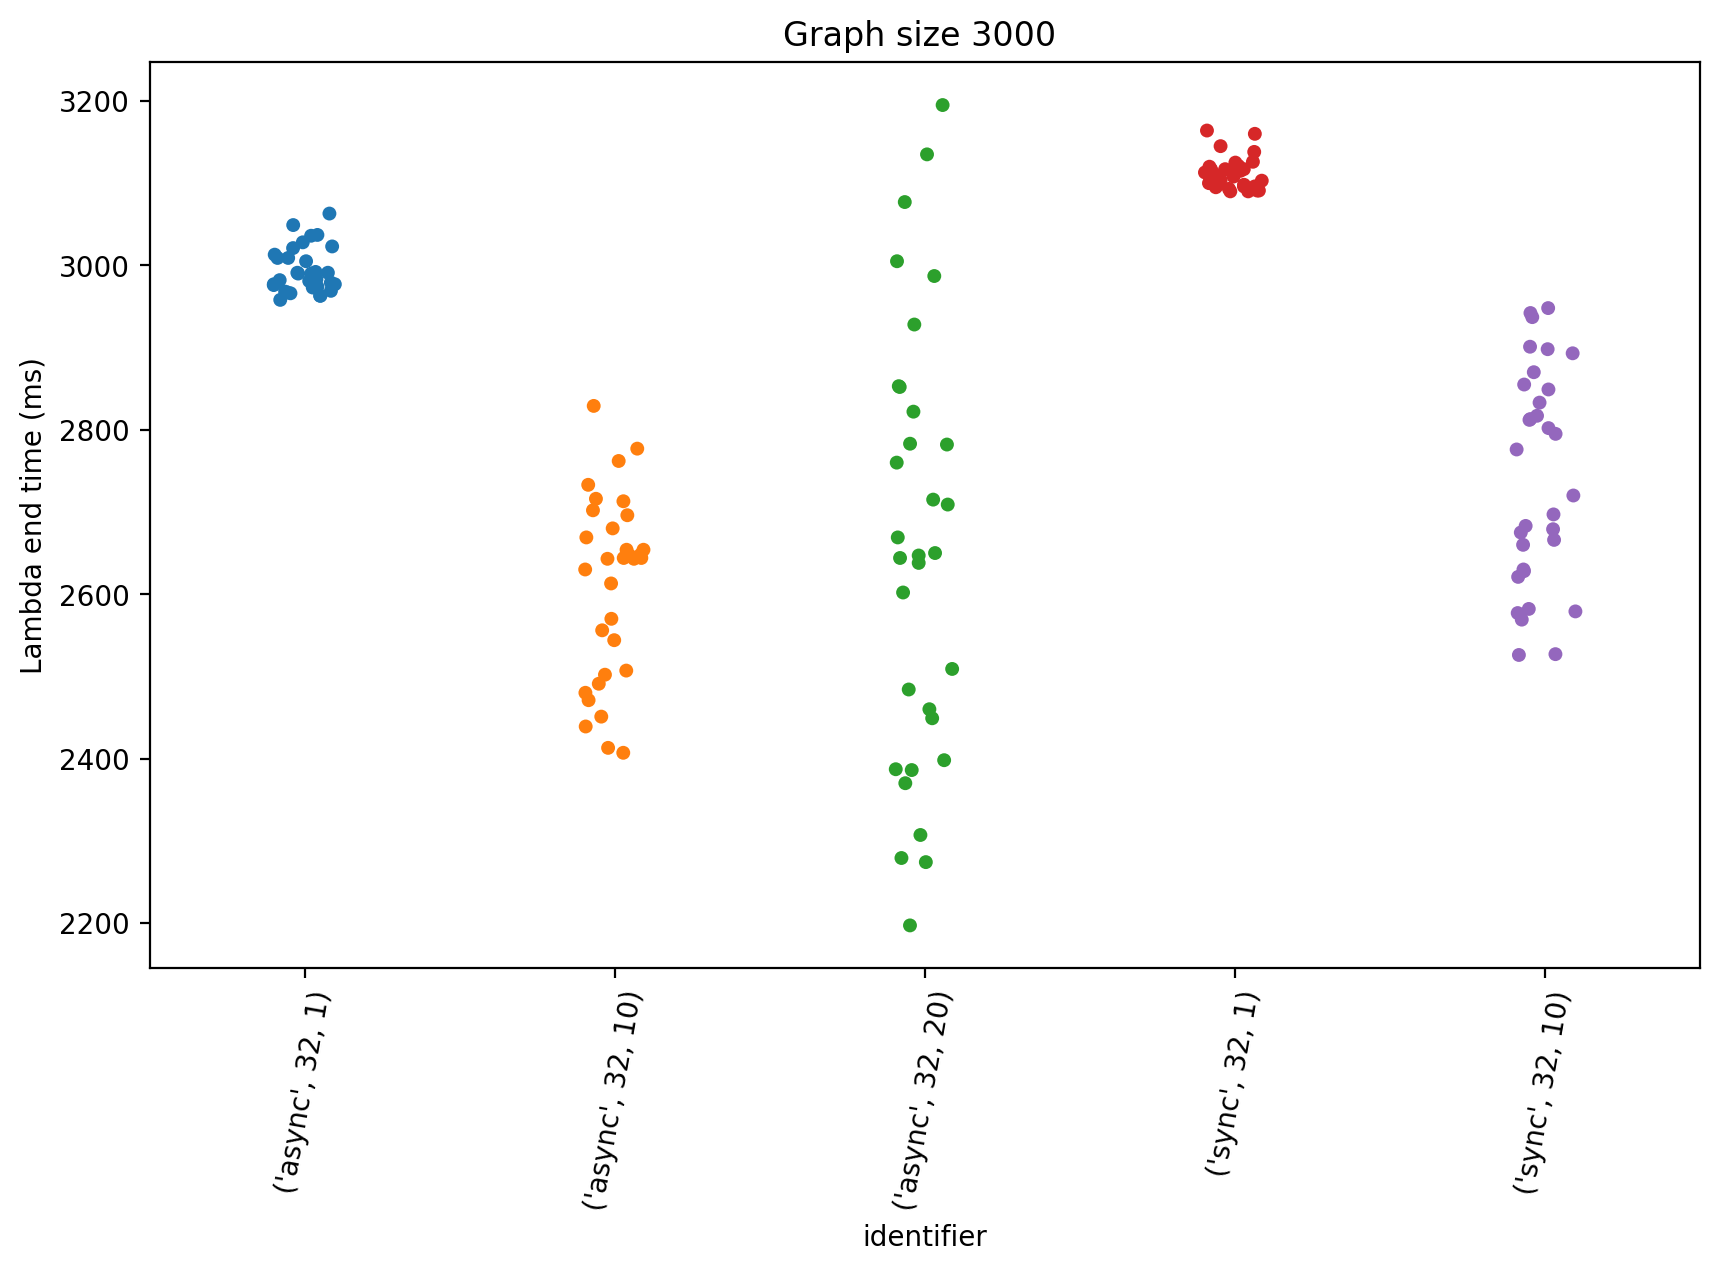

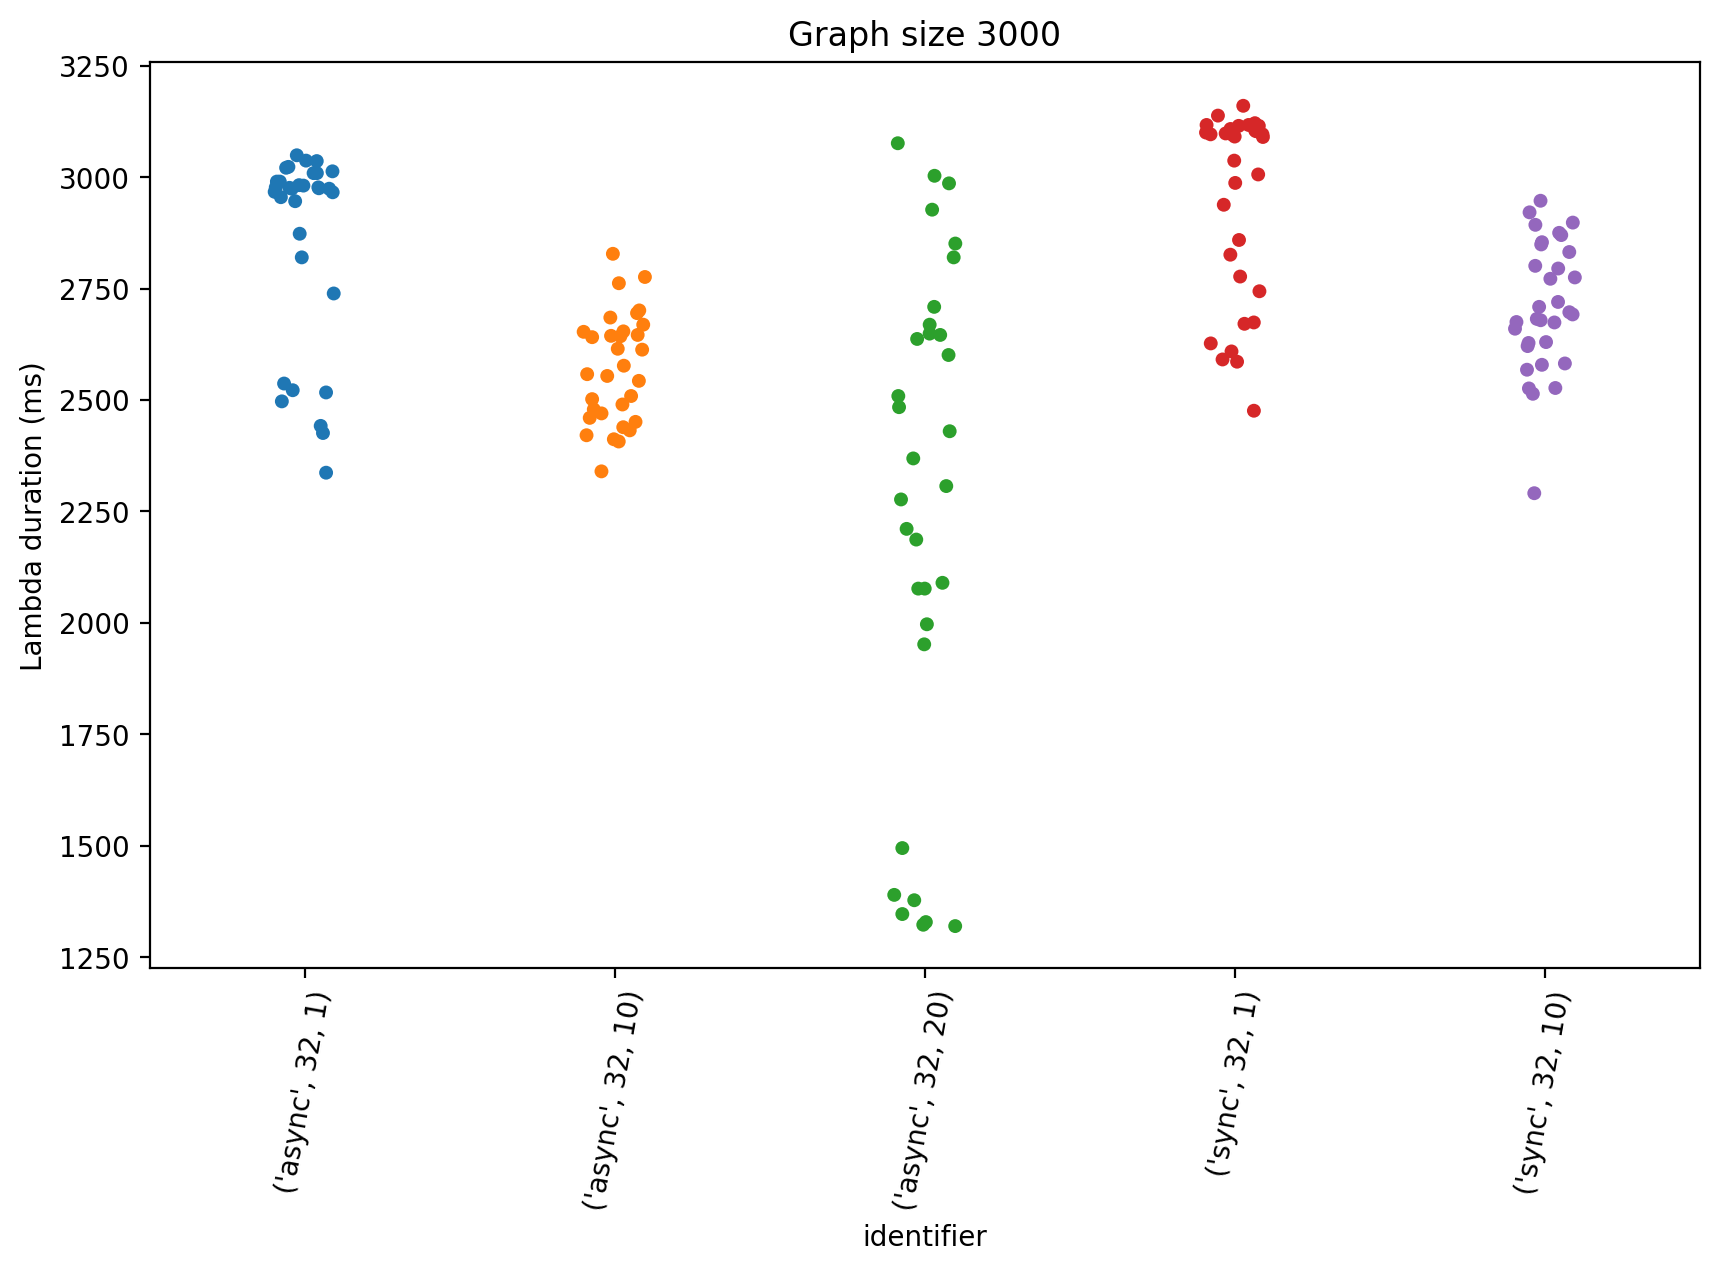

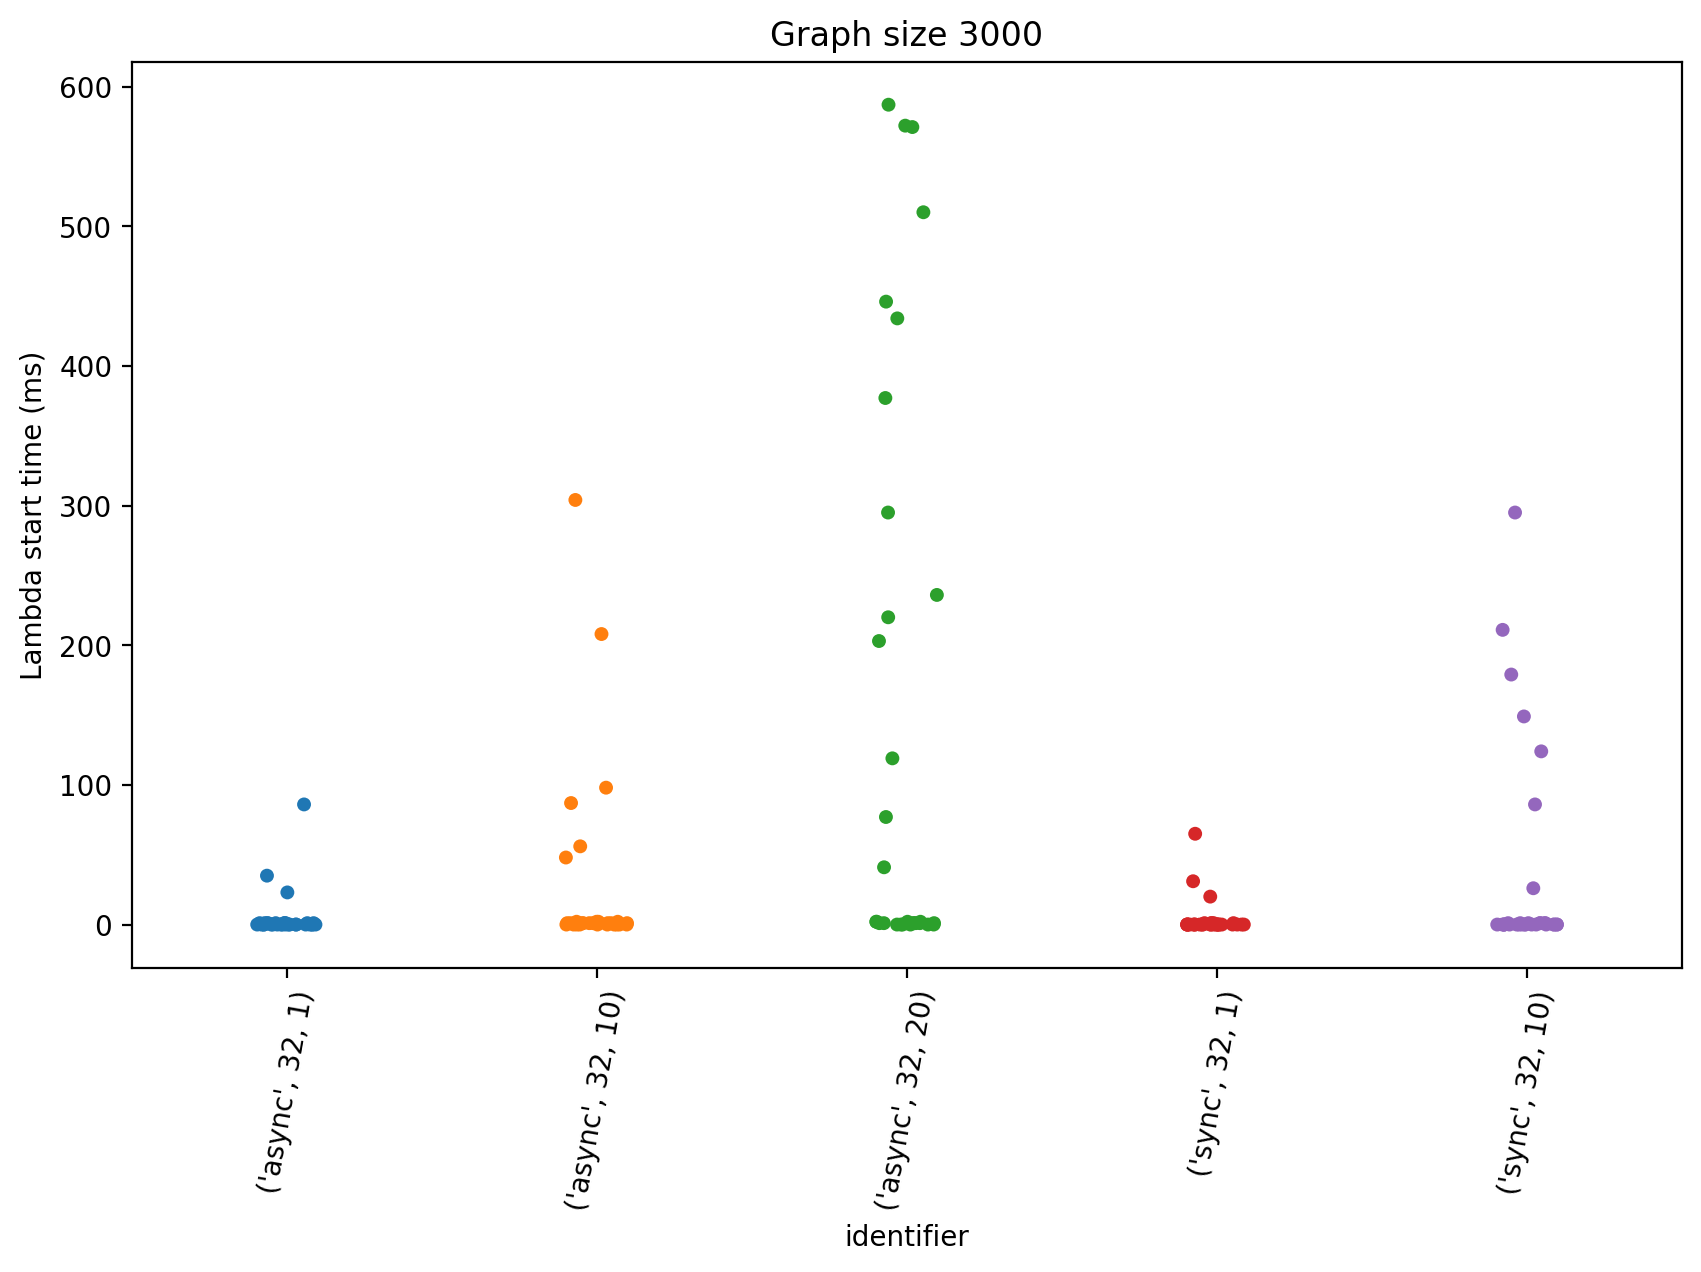

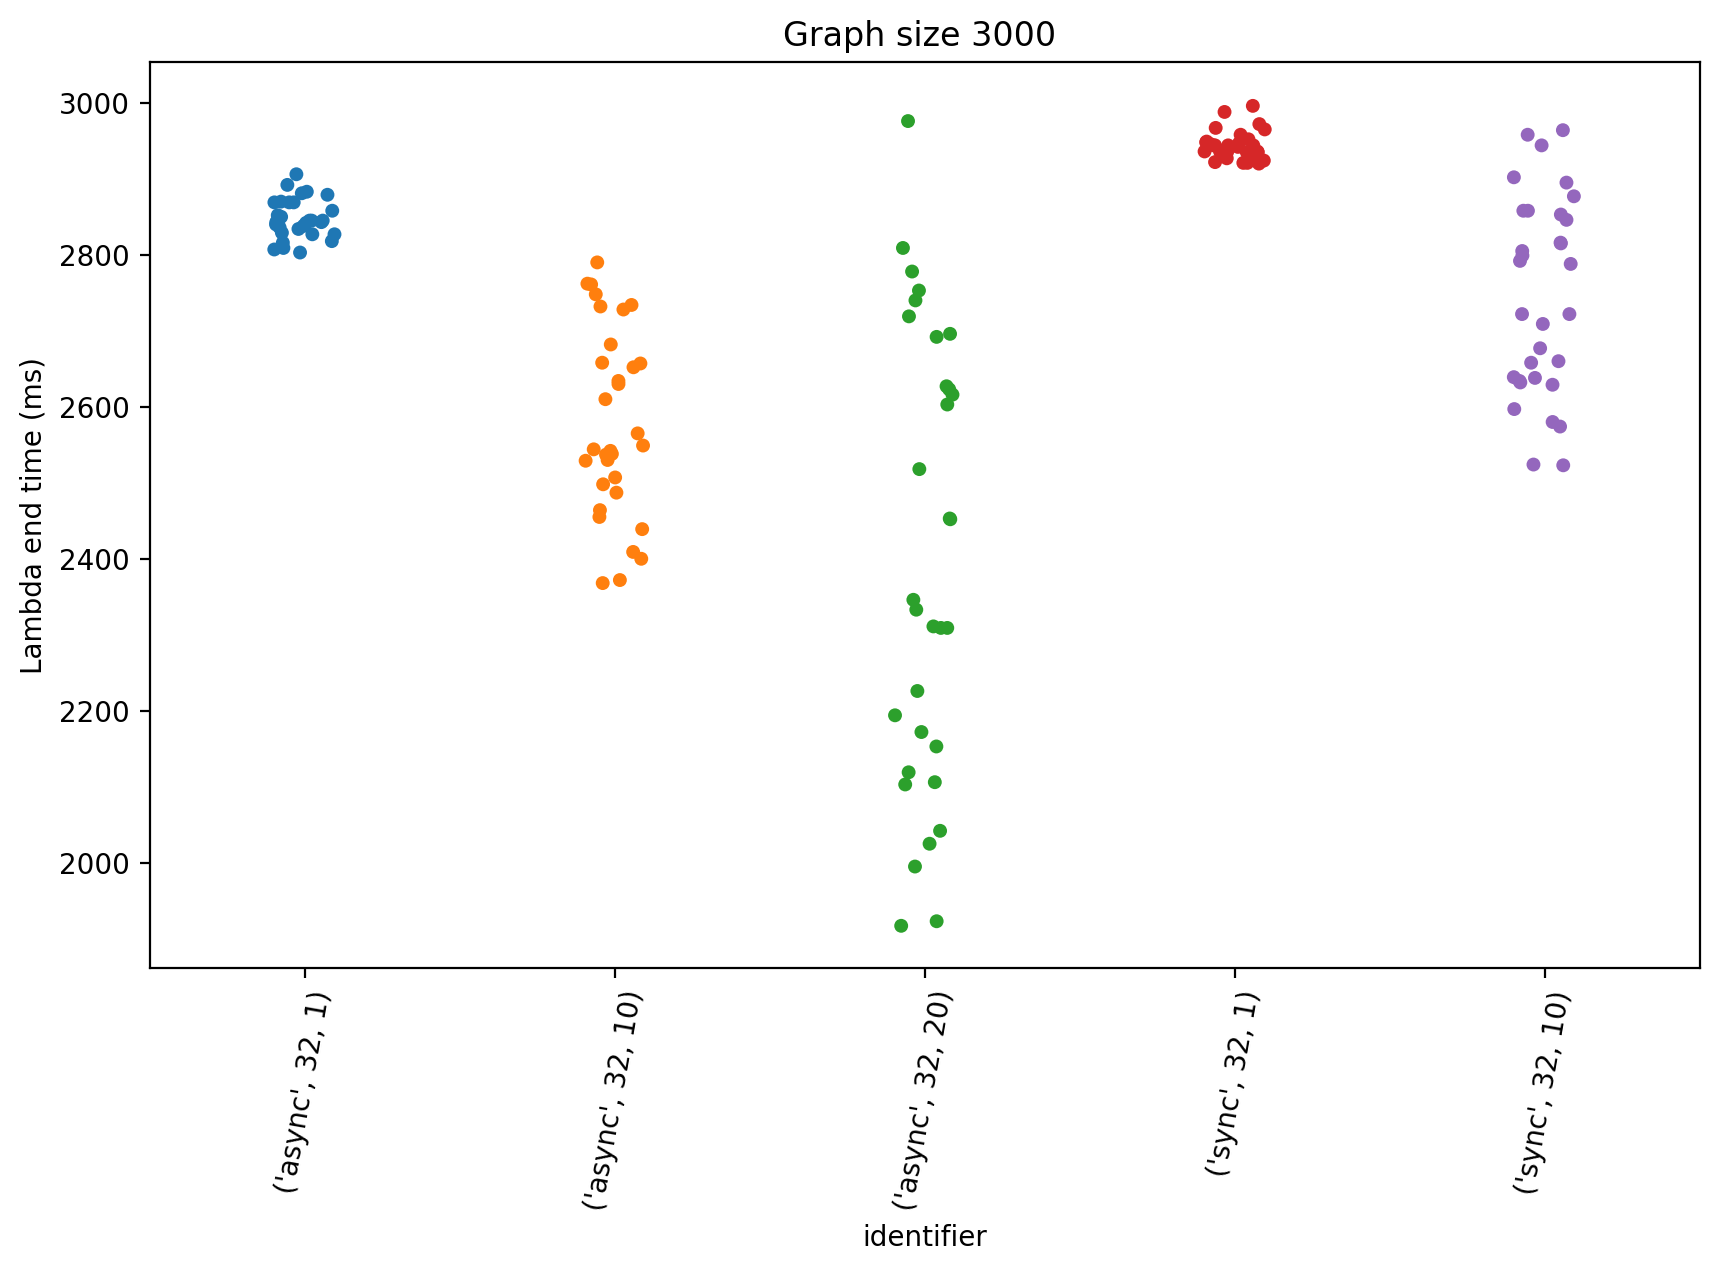

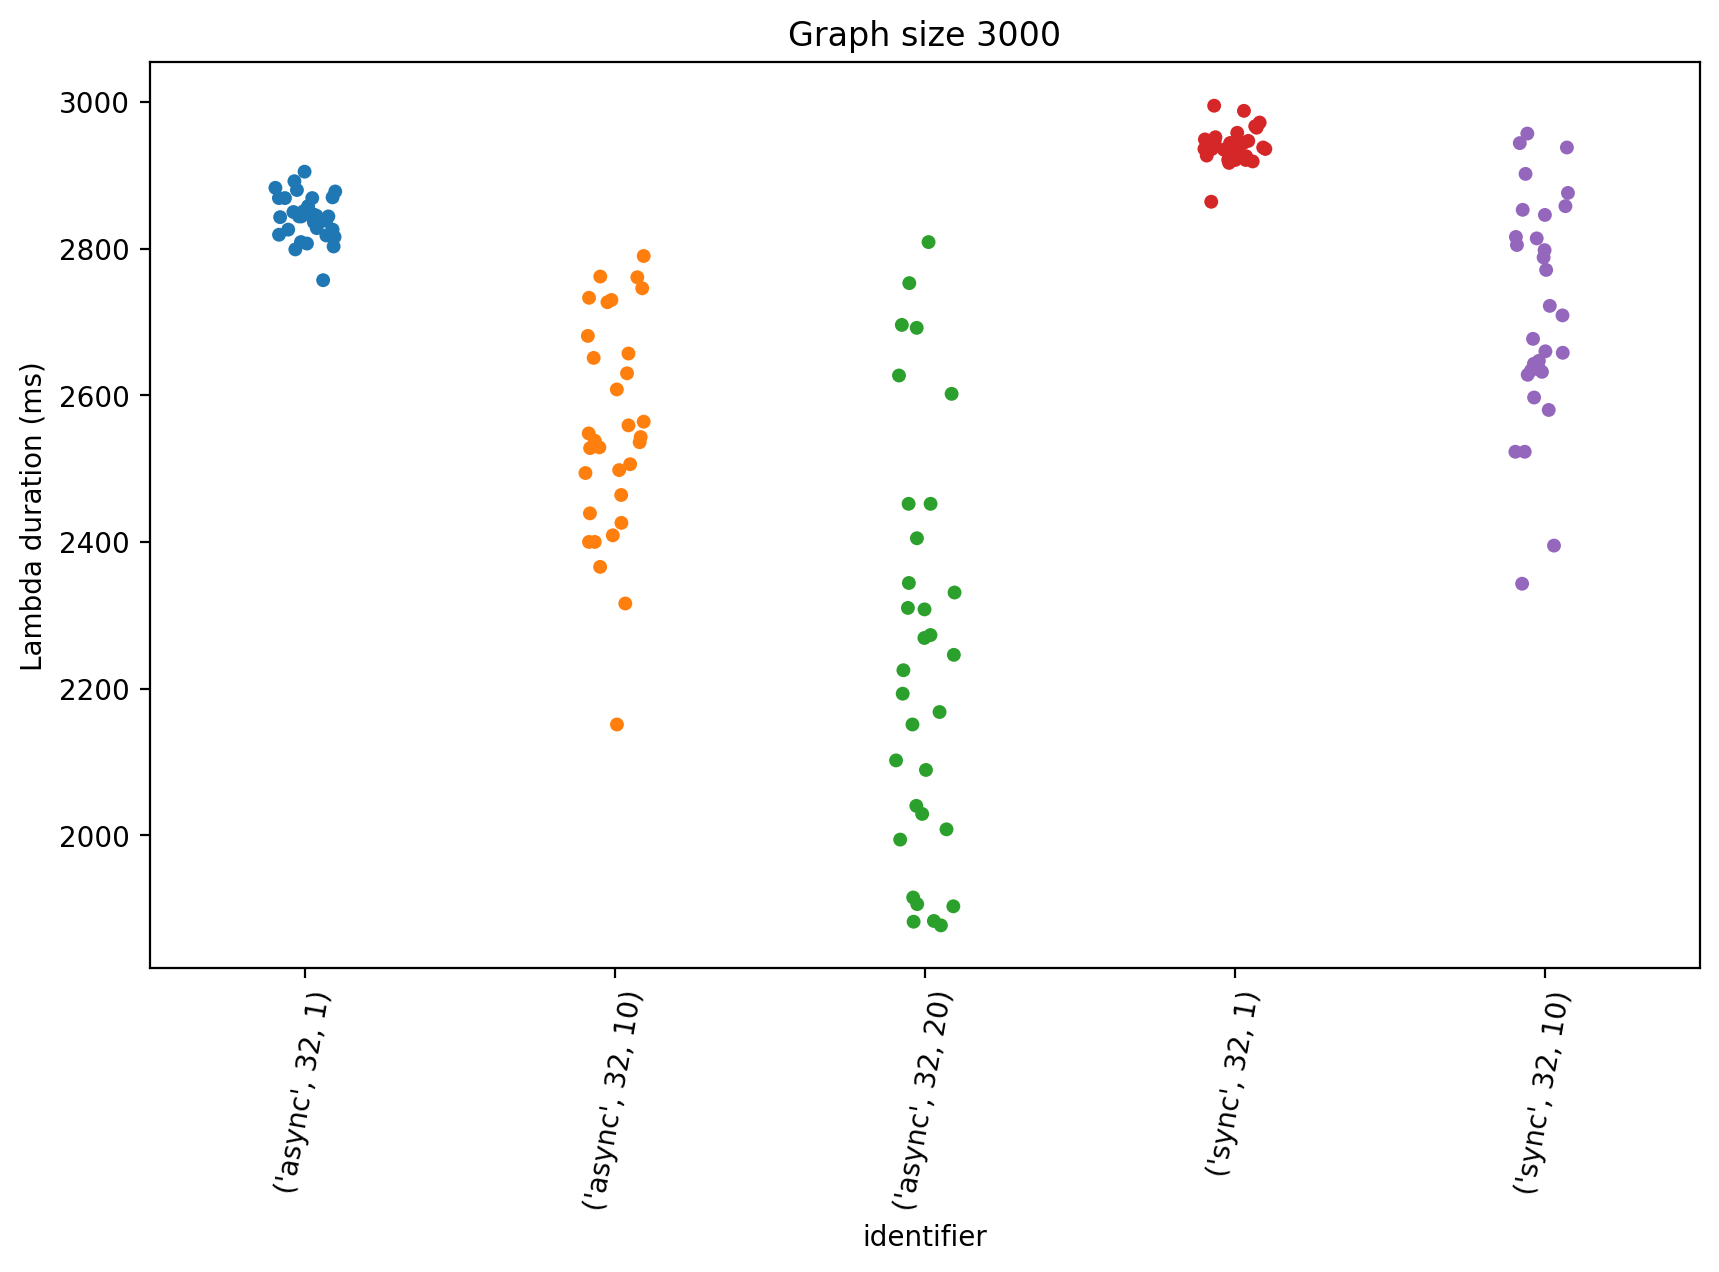

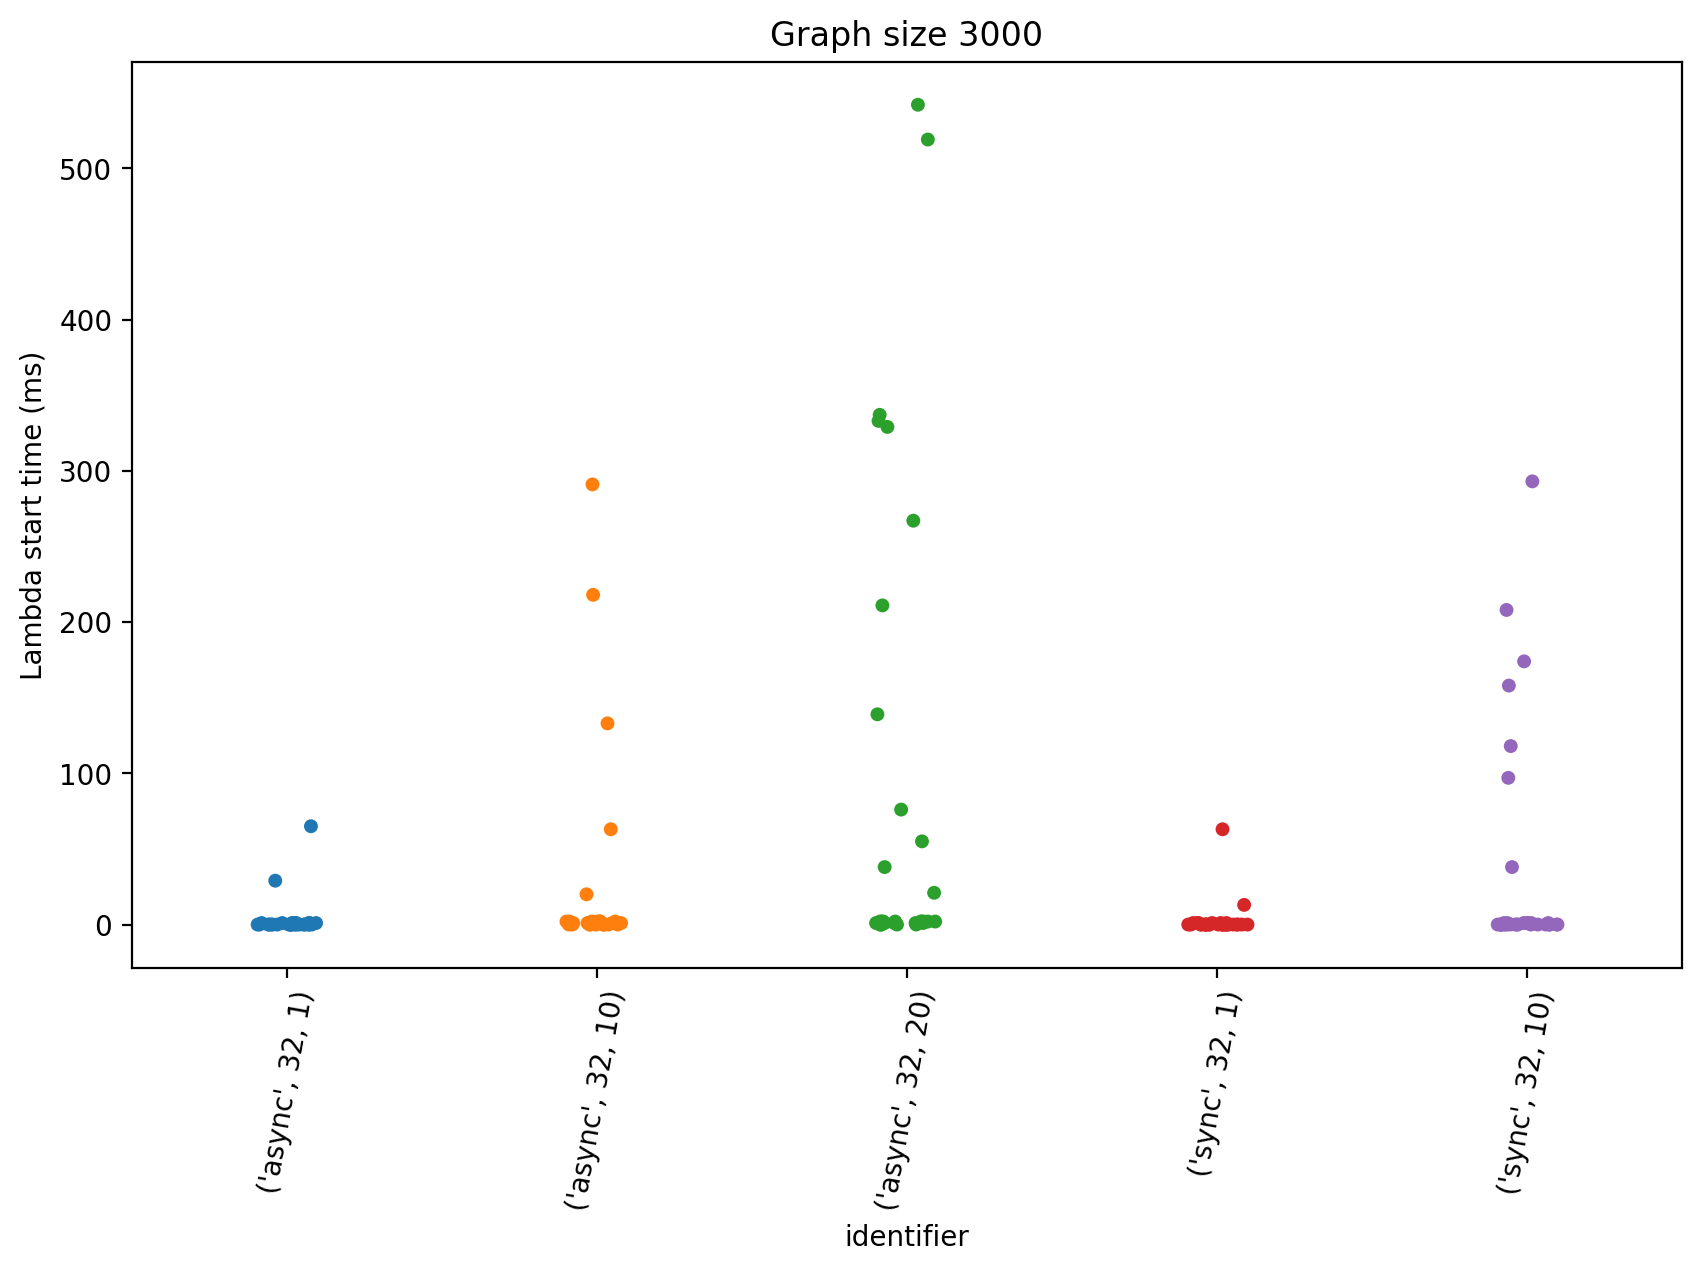

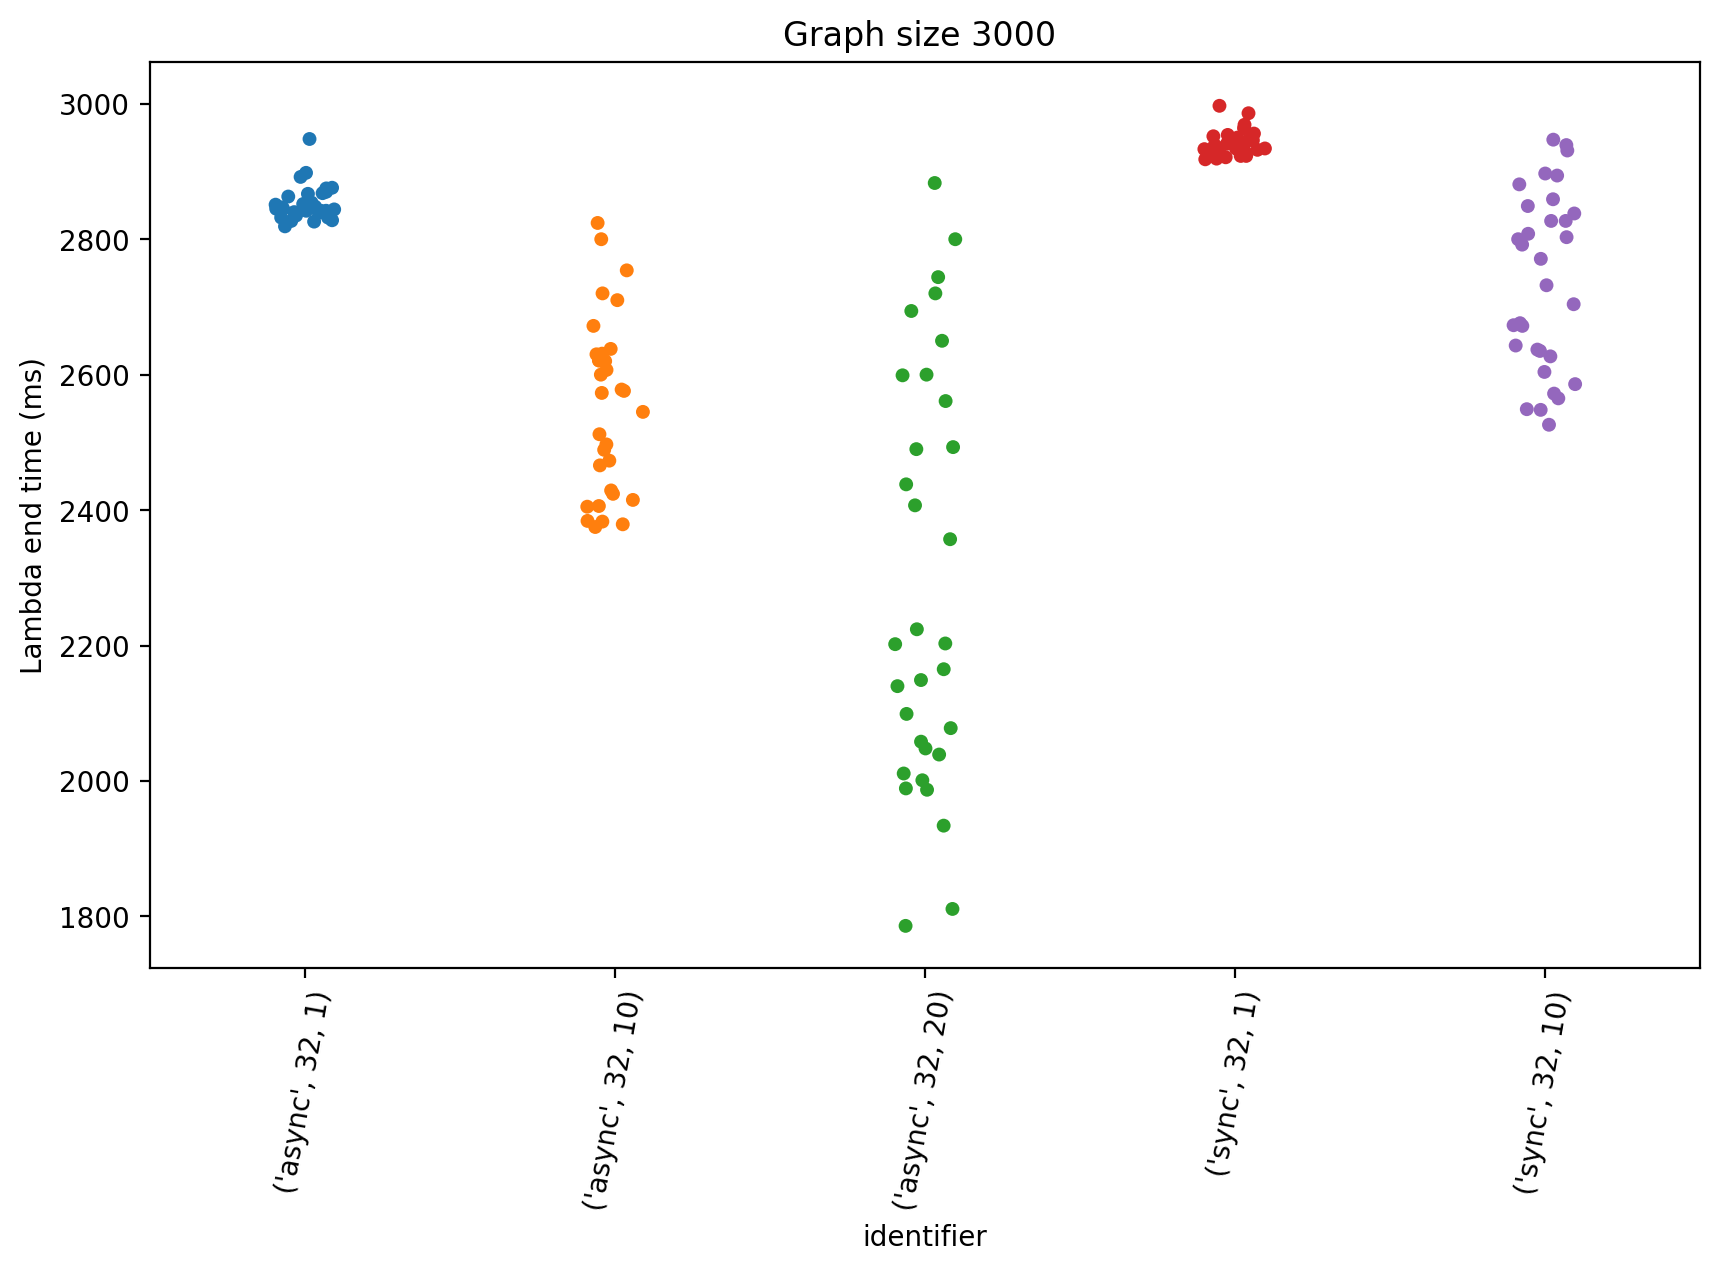

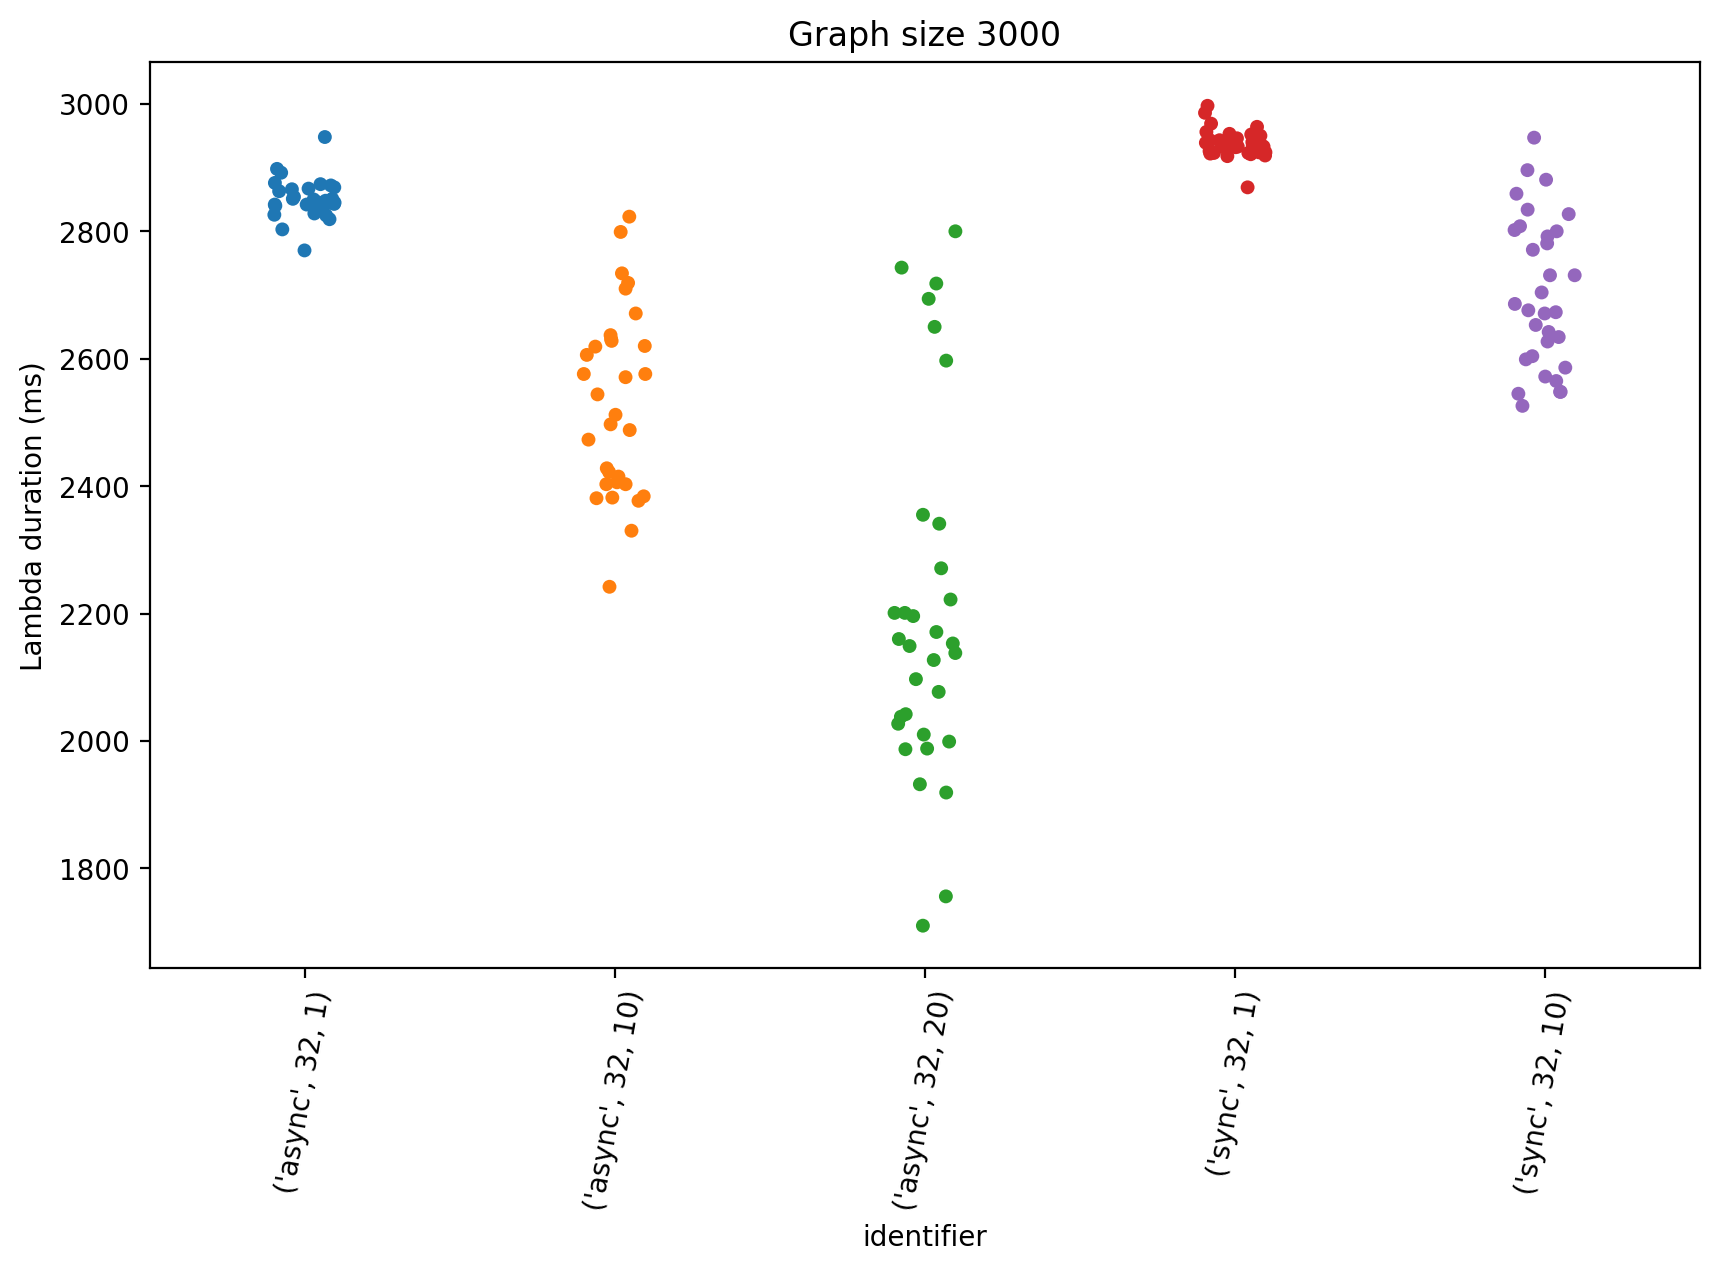

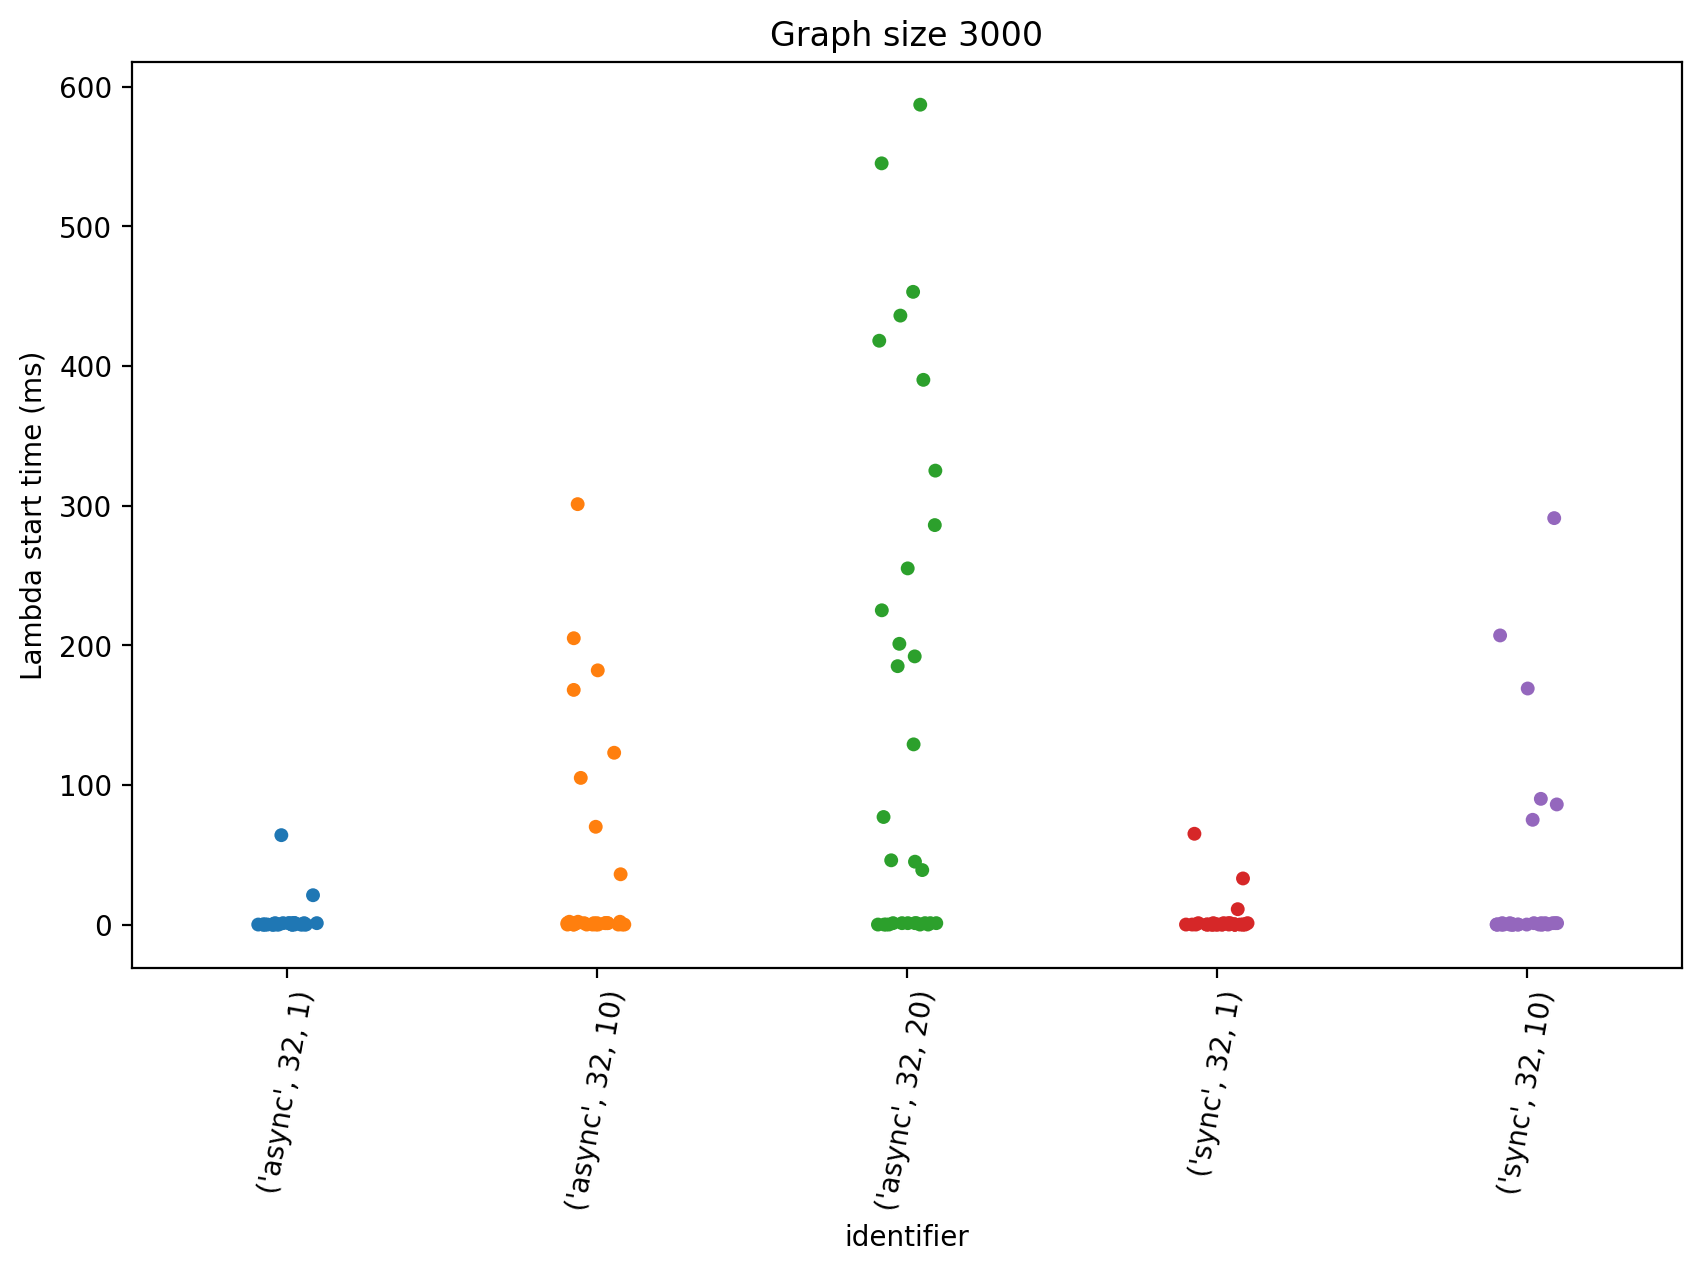

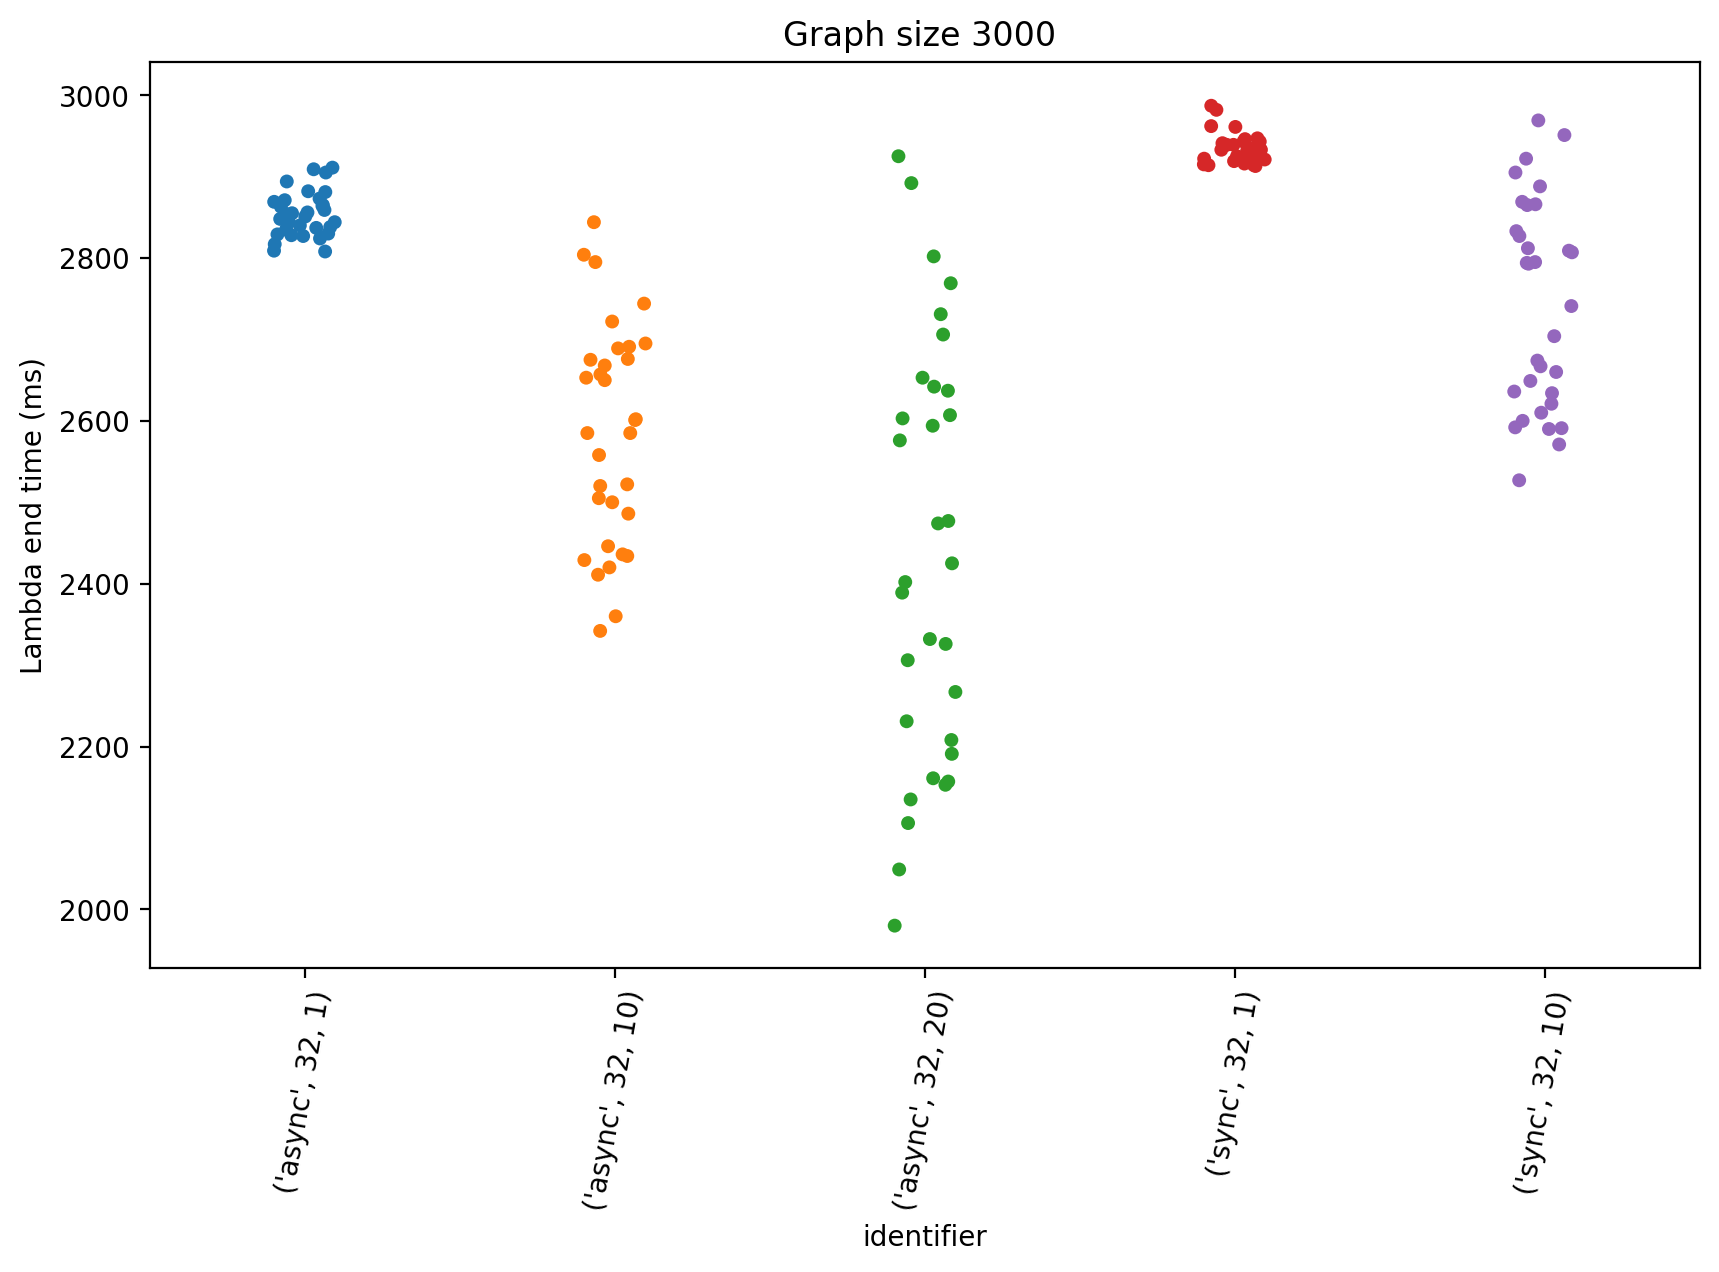

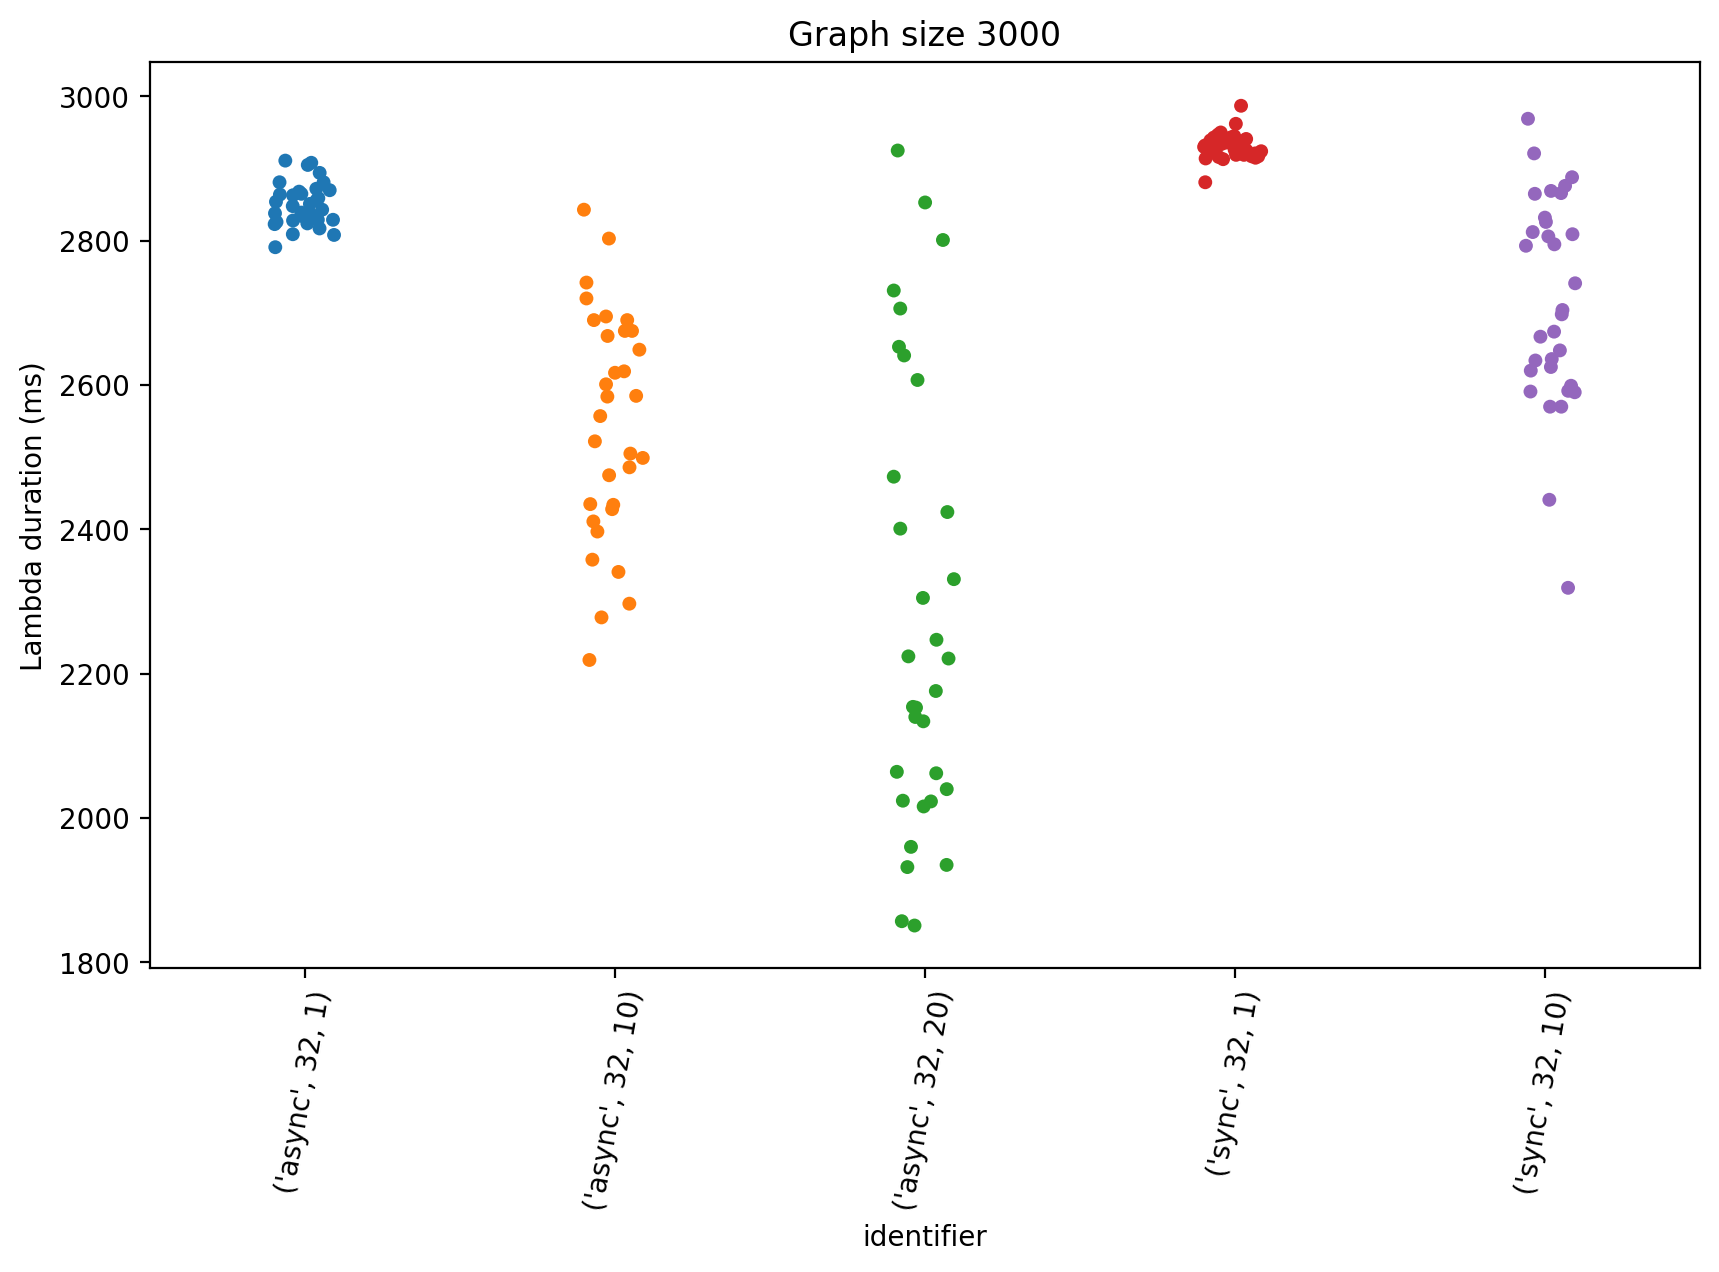

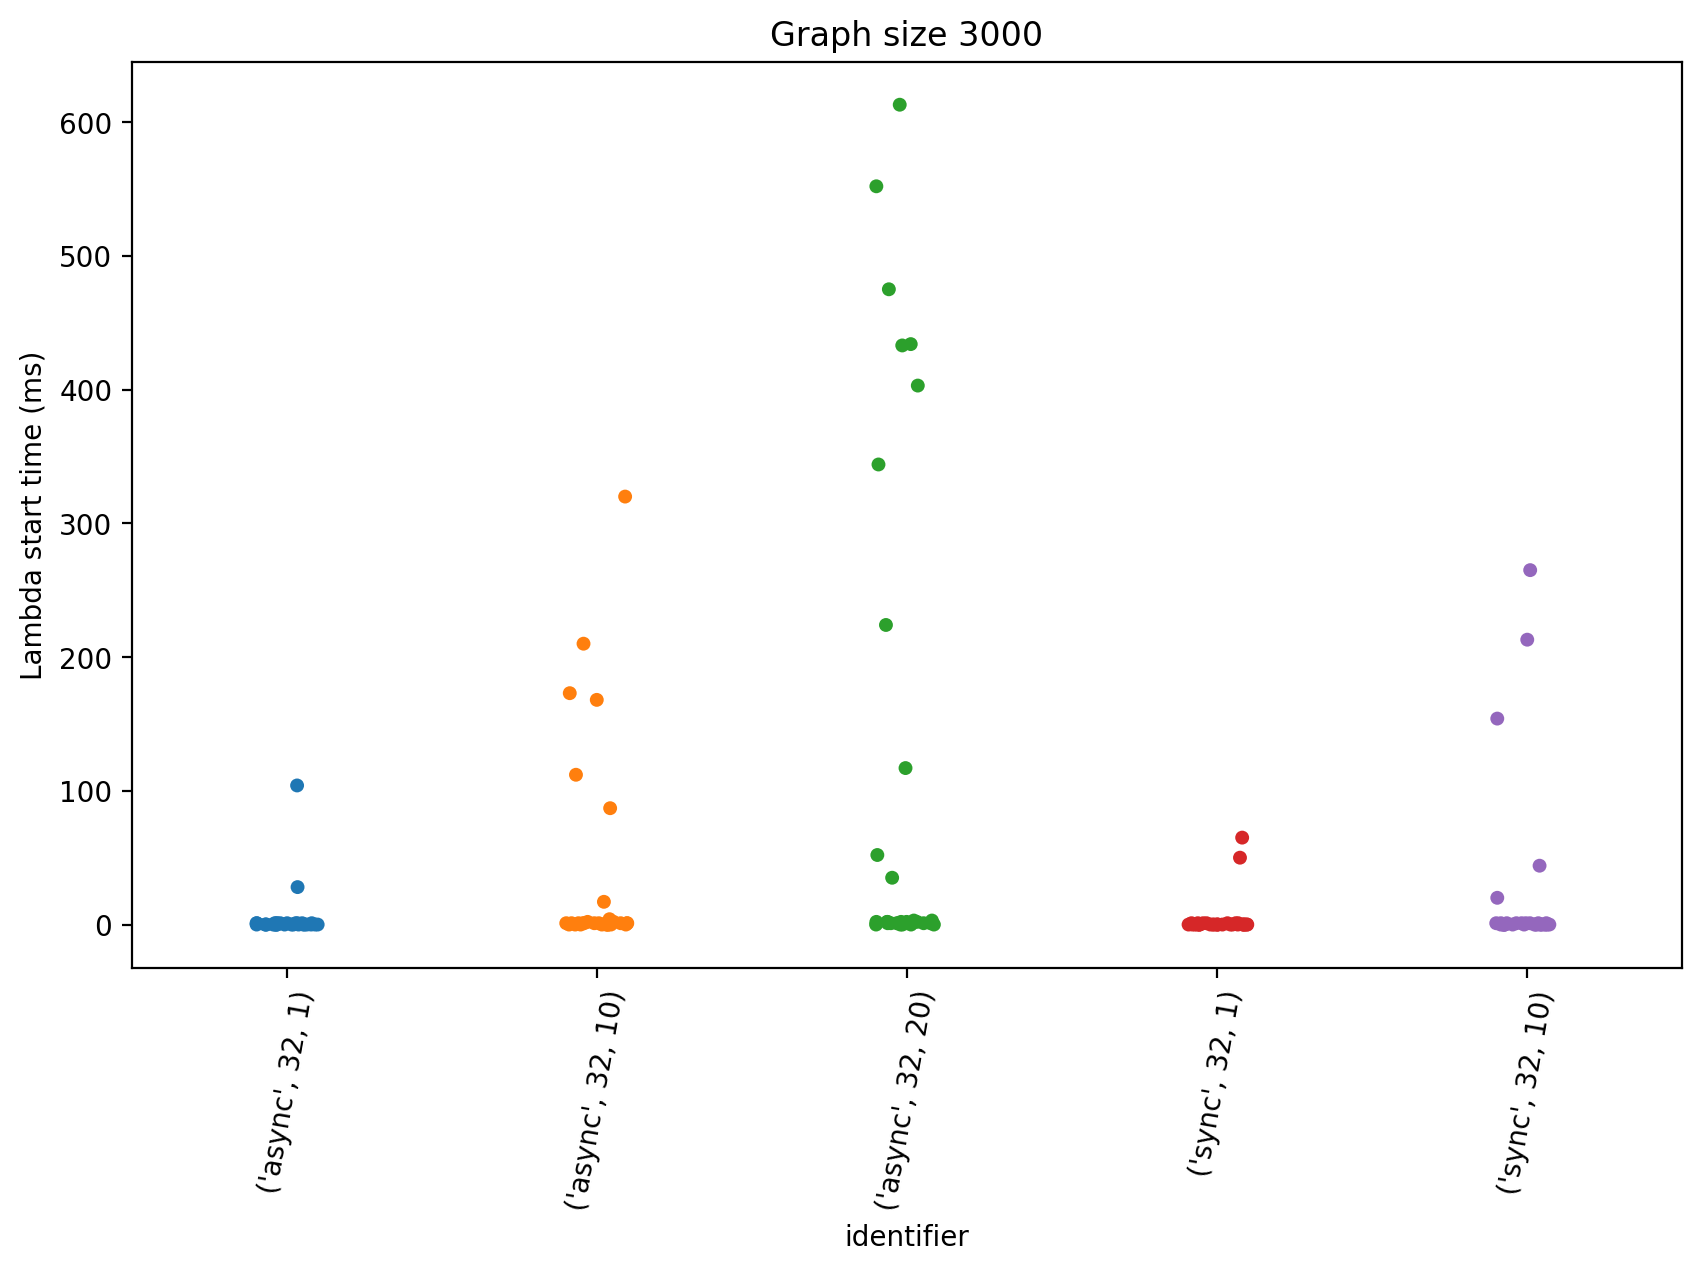

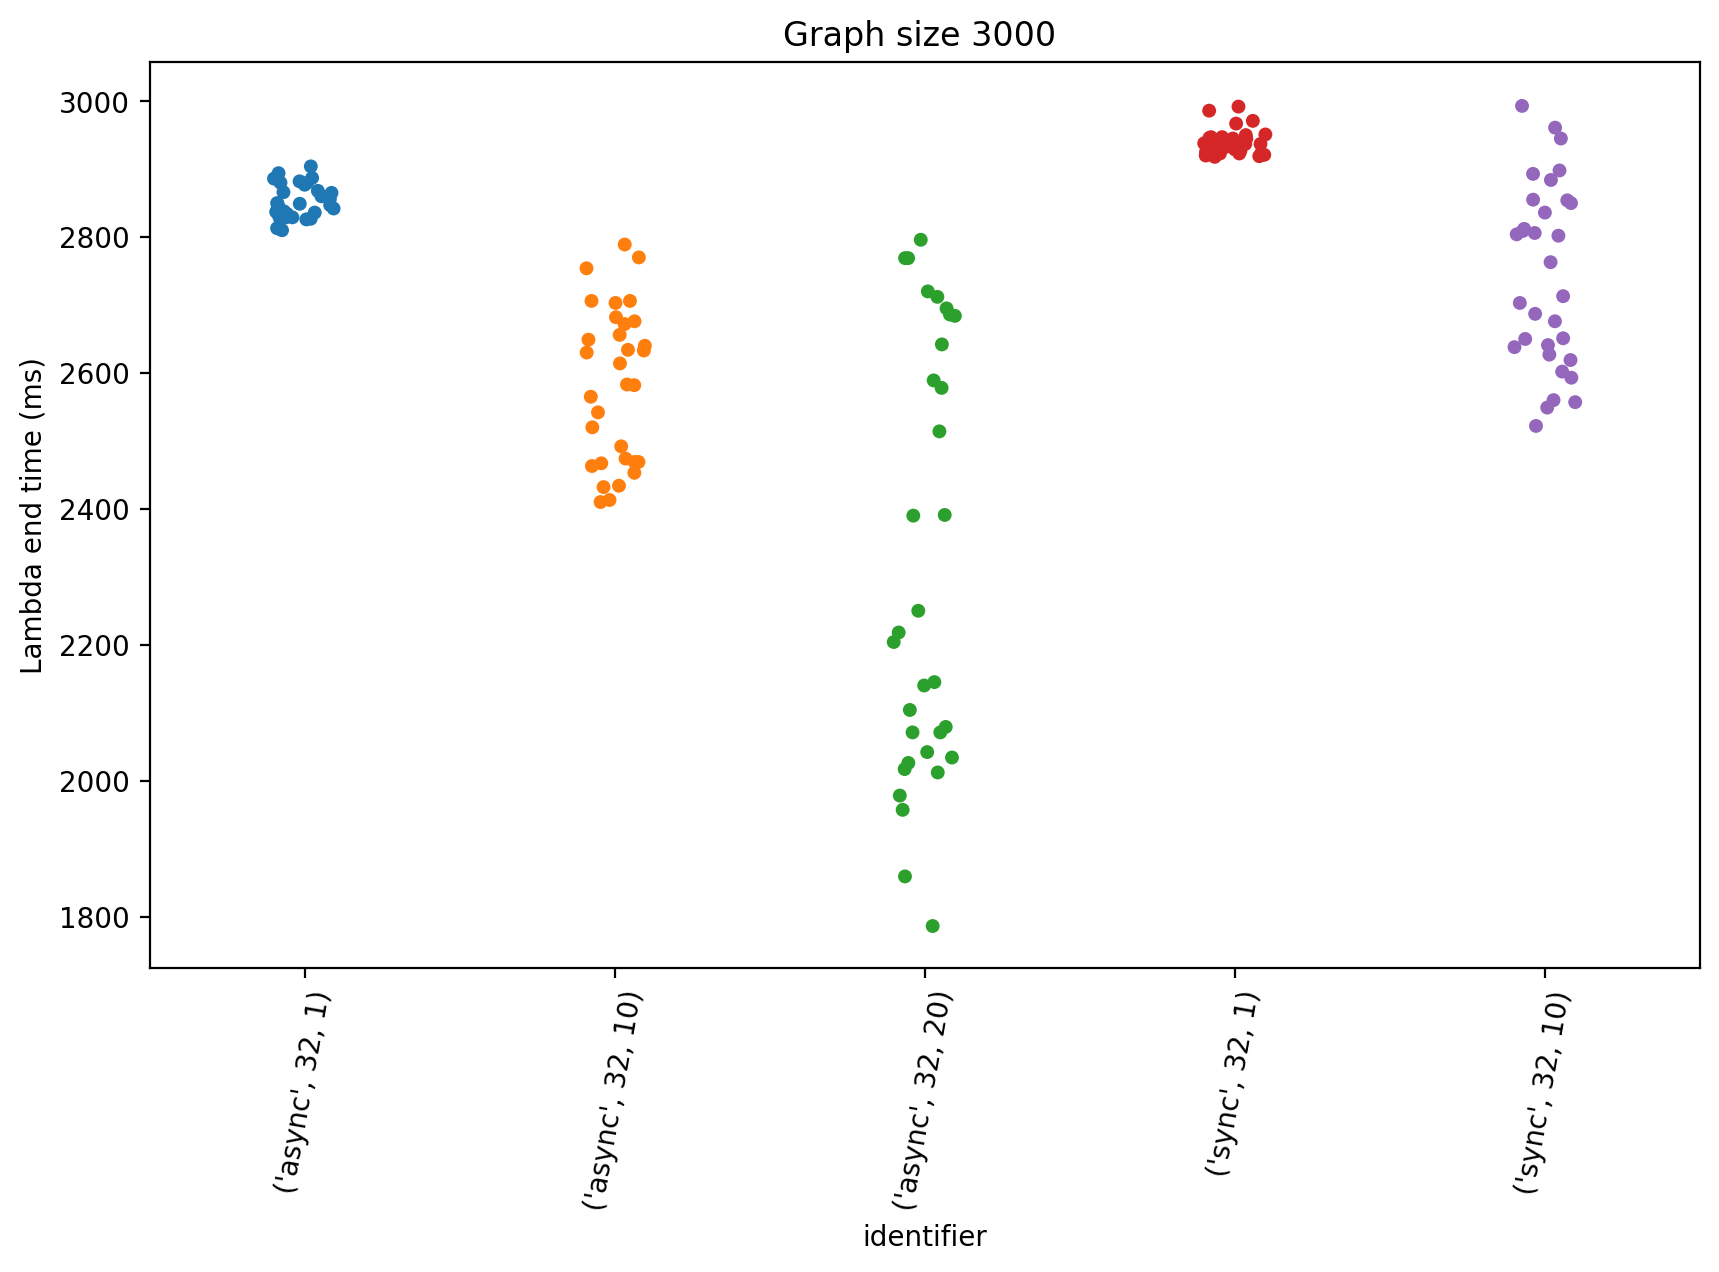

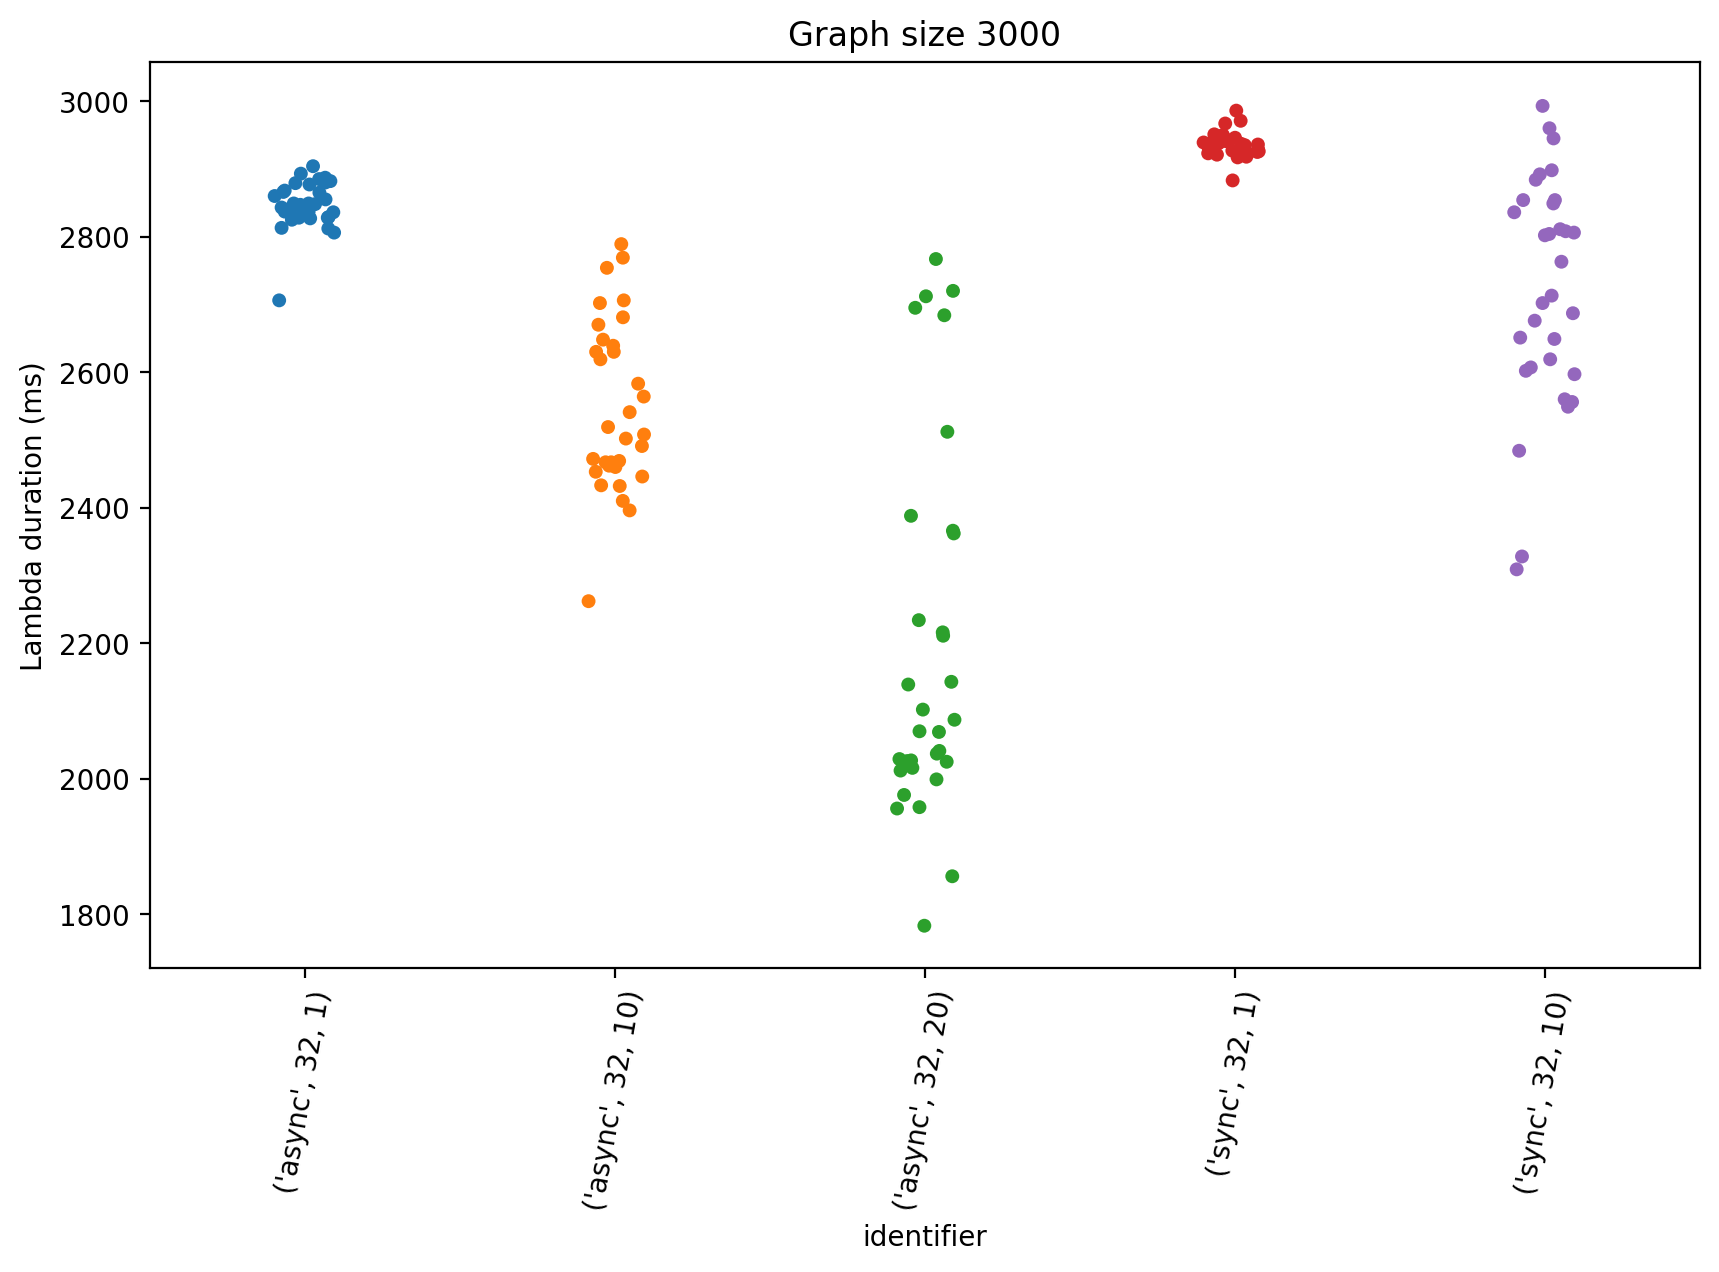

In [6]:
for (graph_size, trial_str), group in df.groupby(["graph_size", "trial_num"]):
    group = group.reset_index()
    plt.figure(figsize=(10, 6), dpi=200)
    sns.stripplot(y="lambda_start_time", x="identifier", data=group, order=plot_order)
    plt.ylabel("Lambda start time (ms)")
    plt.title("Graph size {}".format(graph_size))
    plt.xticks(rotation=80)
    plt.savefig("{}/lambda_start_times_graph_size_{}_{}.pdf".format(SAVE_ROOT, graph_size,  trial_str))

    plt.figure(figsize=(10, 6), dpi=200)
    sns.stripplot(y="lambda_end_time", x="identifier", data=group, order=plot_order)
    plt.ylabel("Lambda end time (ms)")
    plt.title("Graph size {} ".format(graph_size, ))
    plt.xticks(rotation=80)
    
    plt.savefig("{}/lambda_end_times_graph_size_{}_{}.pdf".format(SAVE_ROOT, graph_size, trial_str))


    plt.figure(figsize=(10, 6), dpi=200)
    sns.stripplot(y="lambda_duration", x="identifier", data=group, order=plot_order)
    plt.ylabel("Lambda duration (ms)")
    plt.title("Graph size {}".format(graph_size,))
    plt.xticks(rotation=80)

    plt.savefig("{}/lambda_duration_graph_size_{}_{}.pdf".format(SAVE_ROOT, graph_size, trial_str))



### End Time Comparison

<Figure size 2000x1200 with 0 Axes>

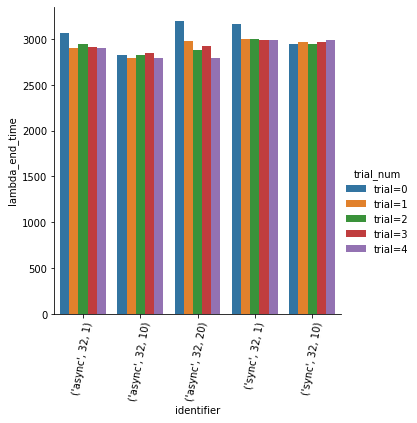

In [7]:
for (graph_size), group in df.groupby(["graph_size"]):
    group = group.groupby(["identifier", "trial_num"], as_index=False).agg({"lambda_end_time": max})

    plt.figure(figsize=(10, 6), dpi=200)
    sns.catplot(data=group, kind="bar", x="identifier", y="lambda_end_time", hue="trial_num", order=plot_order)
    plt.xticks(rotation=80)
    plt.savefig("{}/lambda_last_end_time_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,))
    plt.show()

<Figure size 2000x1200 with 0 Axes>

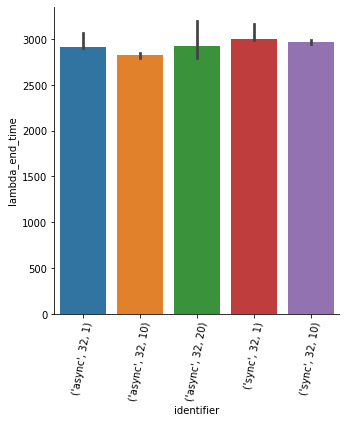

In [8]:
for (graph_size), group in df.groupby(["graph_size"]):
    group = group.groupby(["identifier", "trial_num"], as_index=False).agg({"lambda_end_time": max})

    plt.figure(figsize=(10, 6), dpi=200)
    sns.catplot(data=group, kind="bar", x="identifier", y="lambda_end_time", order=plot_order, estimator=np.median)
    plt.xticks(rotation=80)
    plt.savefig("{}/lambda_last_end_time_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,))

    plt.show()

### Cost comparison

In [9]:
cost_per_100_ms = 0.0000048958
df["cost"] = df["lambda_duration"] / 100 * cost_per_100_ms

<Figure size 2000x1200 with 0 Axes>

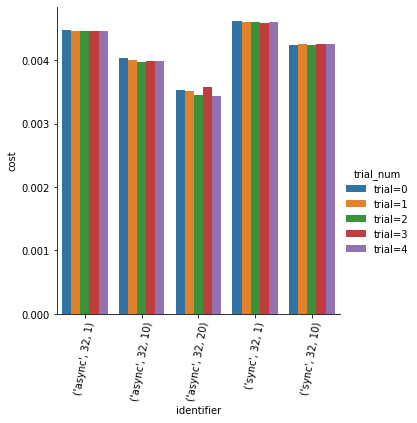

In [10]:
for (graph_size), group in df.groupby(["graph_size"]):
    group = group.groupby(["identifier", "trial_num"], as_index=False).agg({"cost": sum})
    plt.figure(figsize=(10, 6), dpi=200)
    sns.catplot(data=group, kind="bar", x="identifier", y="cost", hue="trial_num", order=plot_order)
    plt.xticks(rotation=80)
    plt.savefig("{}/lambda_cost_by_trial_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,))
    plt.show()

<Figure size 2000x1200 with 0 Axes>

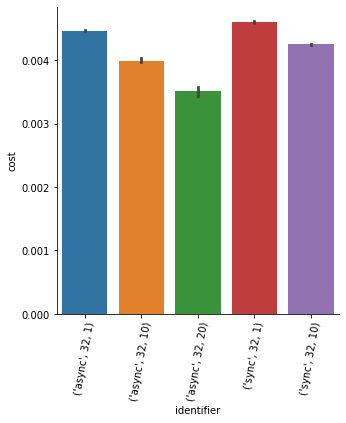

In [11]:
for (graph_size), group in df.groupby(["graph_size"]):
    group = group.groupby(["identifier", "trial_num"], as_index=False).agg({"cost": sum})
    plt.figure(figsize=(10, 6), dpi=200)
    sns.catplot(data=group, kind="bar", x="identifier", y="cost", order=plot_order, estimator=np.median)
    plt.xticks(rotation=80)
    plt.savefig("{}/lambda_cost_graph_size_{}.pdf".format(SAVE_ROOT, graph_size,))
    plt.show()